In [43]:
# BUSINESS QUESTION

#We need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("kc_house_data.csv")

In [44]:
## EXPLORE & UNDERSTAND THE DATA

In [8]:
df.head(11)

id        date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  10/13/2014   221900.0         3       1.00         1180   
1   6414100192   12/9/2014   538000.0         3       2.25         2570   
2   5631500400   2/25/2015   180000.0         2       1.00          770   
3   2487200875   12/9/2014   604000.0         4       3.00         1960   
4   1954400510   2/18/2015   510000.0         3       2.00         1680   
5   7237550310   5/12/2014  1230000.0         4       4.50         5420   
6   1321400060   6/27/2014   257500.0         3       2.25         1715   
7   2008000270   1/15/2015   291850.0         3       1.50         1060   
8   2414600126   4/15/2015   229500.0         3       1.00         1780   
9   3793500160   3/12/2015   323000.0         3       2.50         1890   
10  1736800520    4/3/2015   662500.0         3       2.50         3560   

    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0       5650     1.0         NaN   0.0  ...      7        1180            0.0   
1       7242     2.0         0.0   0.0  ...      7        2170          400.0   
2      10000     1.0         0.0   0.0  ...      6         770            0.0   
3       5000     1.0         0.0   0.0  ...      7        1050          910.0   
4       8080     1.0         0.0   0.0  ...      8        1680            0.0   
5     101930     1.0         0.0   0.0  ...     11        3890         1530.0   
6       6819     2.0         0.0   0.0  ...      7        1715              ?   
7       9711     1.0         0.0   NaN  ...      7        1060            0.0   
8       7470     1.0         0.0   0.0  ...      7        1050          730.0   
9       6560     2.0         0.0   0.0  ...      7        1890            0.0   
10      9796     1.0         NaN   0.0  ...      8        1860         1700.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           NaN    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   
5      2001           0.0    98053  47.6561 -122.005           4760   
6      1995           0.0    98003  47.3097 -122.327           2238   
7      1963           0.0    98198  47.4095 -122.315           1650   
8      1960           0.0    98146  47.5123 -122.337           1780   
9      2003           0.0    98038  47.3684 -122.031           2390   
10     1965           0.0    98007  47.6007 -122.145           2210   

    sqft_lot15  
0         5650  
1         7639  
2         8062  
3         5000  
4         7503  
5       101930  
6         6819  
7         9711  
8         8113  
9         7570  
10        8925  

[11 rows x 21 columns]

In [9]:
df.tail(11)

id        date      price  bedrooms  bathrooms  ...  zipcode  \
21586   844000965   6/26/2014   224000.0         3       1.75  ...    98010   
21587  7852140040   8/25/2014   507250.0         3       2.50  ...    98065   
21588  9834201367   1/26/2015   429000.0         3       2.00  ...    98144   
21589  3448900210  10/14/2014   610685.0         4       2.50  ...    98056   
21590  7936000429   3/26/2015  1010000.0         4       3.50  ...    98136   
21591  2997800021   2/19/2015   475000.0         3       2.50  ...    98116   
21592   263000018   5/21/2014   360000.0         3       2.50  ...    98103   
21593  6600060120   2/23/2015   400000.0         4       2.50  ...    98146   
21594  1523300141   6/23/2014   402101.0         2       0.75  ...    98144   
21595   291310100   1/16/2015   400000.0         3       2.50  ...    98027   
21596  1523300157  10/15/2014   325000.0         2       0.75  ...    98144   

           lat     long  sqft_living15  sqft_lot15  
21586  47.3095 -122.002           1320       11303  
21587  47.5389 -121.881           2270        5731  
21588  47.5699 -122.288           1400        1230  
21589  47.5137 -122.167           2520        6023  
21590  47.5537 -122.398           2050        6200  
21591  47.5773 -122.409           1330        1265  
21592  47.6993 -122.346           1530        1509  
21593  47.5107 -122.362           1830        7200  
21594  47.5944 -122.299           1020        2007  
21595  47.5345 -122.069           1410        1287  
21596  47.5941 -122.299           1020        1357  

[11 rows x 21 columns]

In [10]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [45]:
### DATA CLEANING

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825    

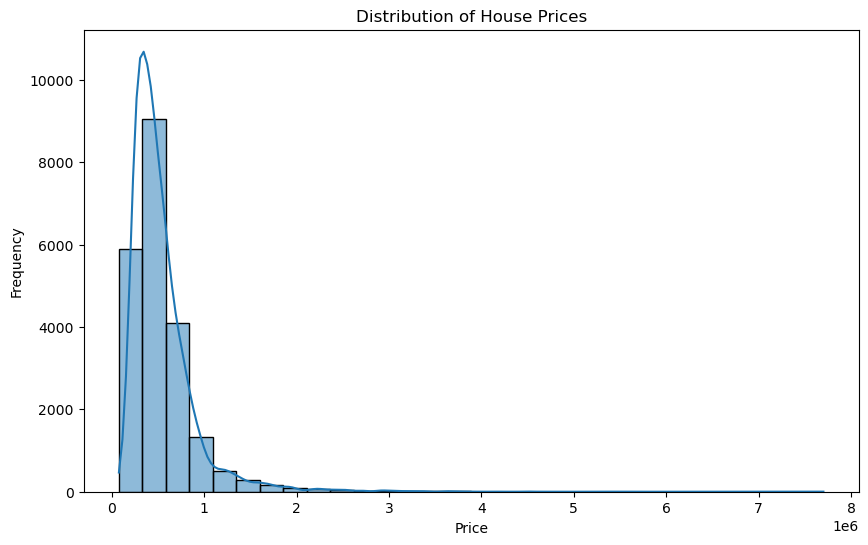

In [11]:
# Display summary statistics
print(df.describe())

# Display data types and null values
print(df.info())

# Display the number of unique values for each column
print(df.nunique())

# Visualize the distribution of the target variable (price)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [12]:
print(df.isna().sum())

df = df.dropna()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [46]:
##Model Building

In [13]:
df['date'] = pd.to_datetime(df['date'])

# Check for duplicates
print(df.duplicated().sum())

print(df.duplicated().sum())

df = df.drop_duplicates()

0
0


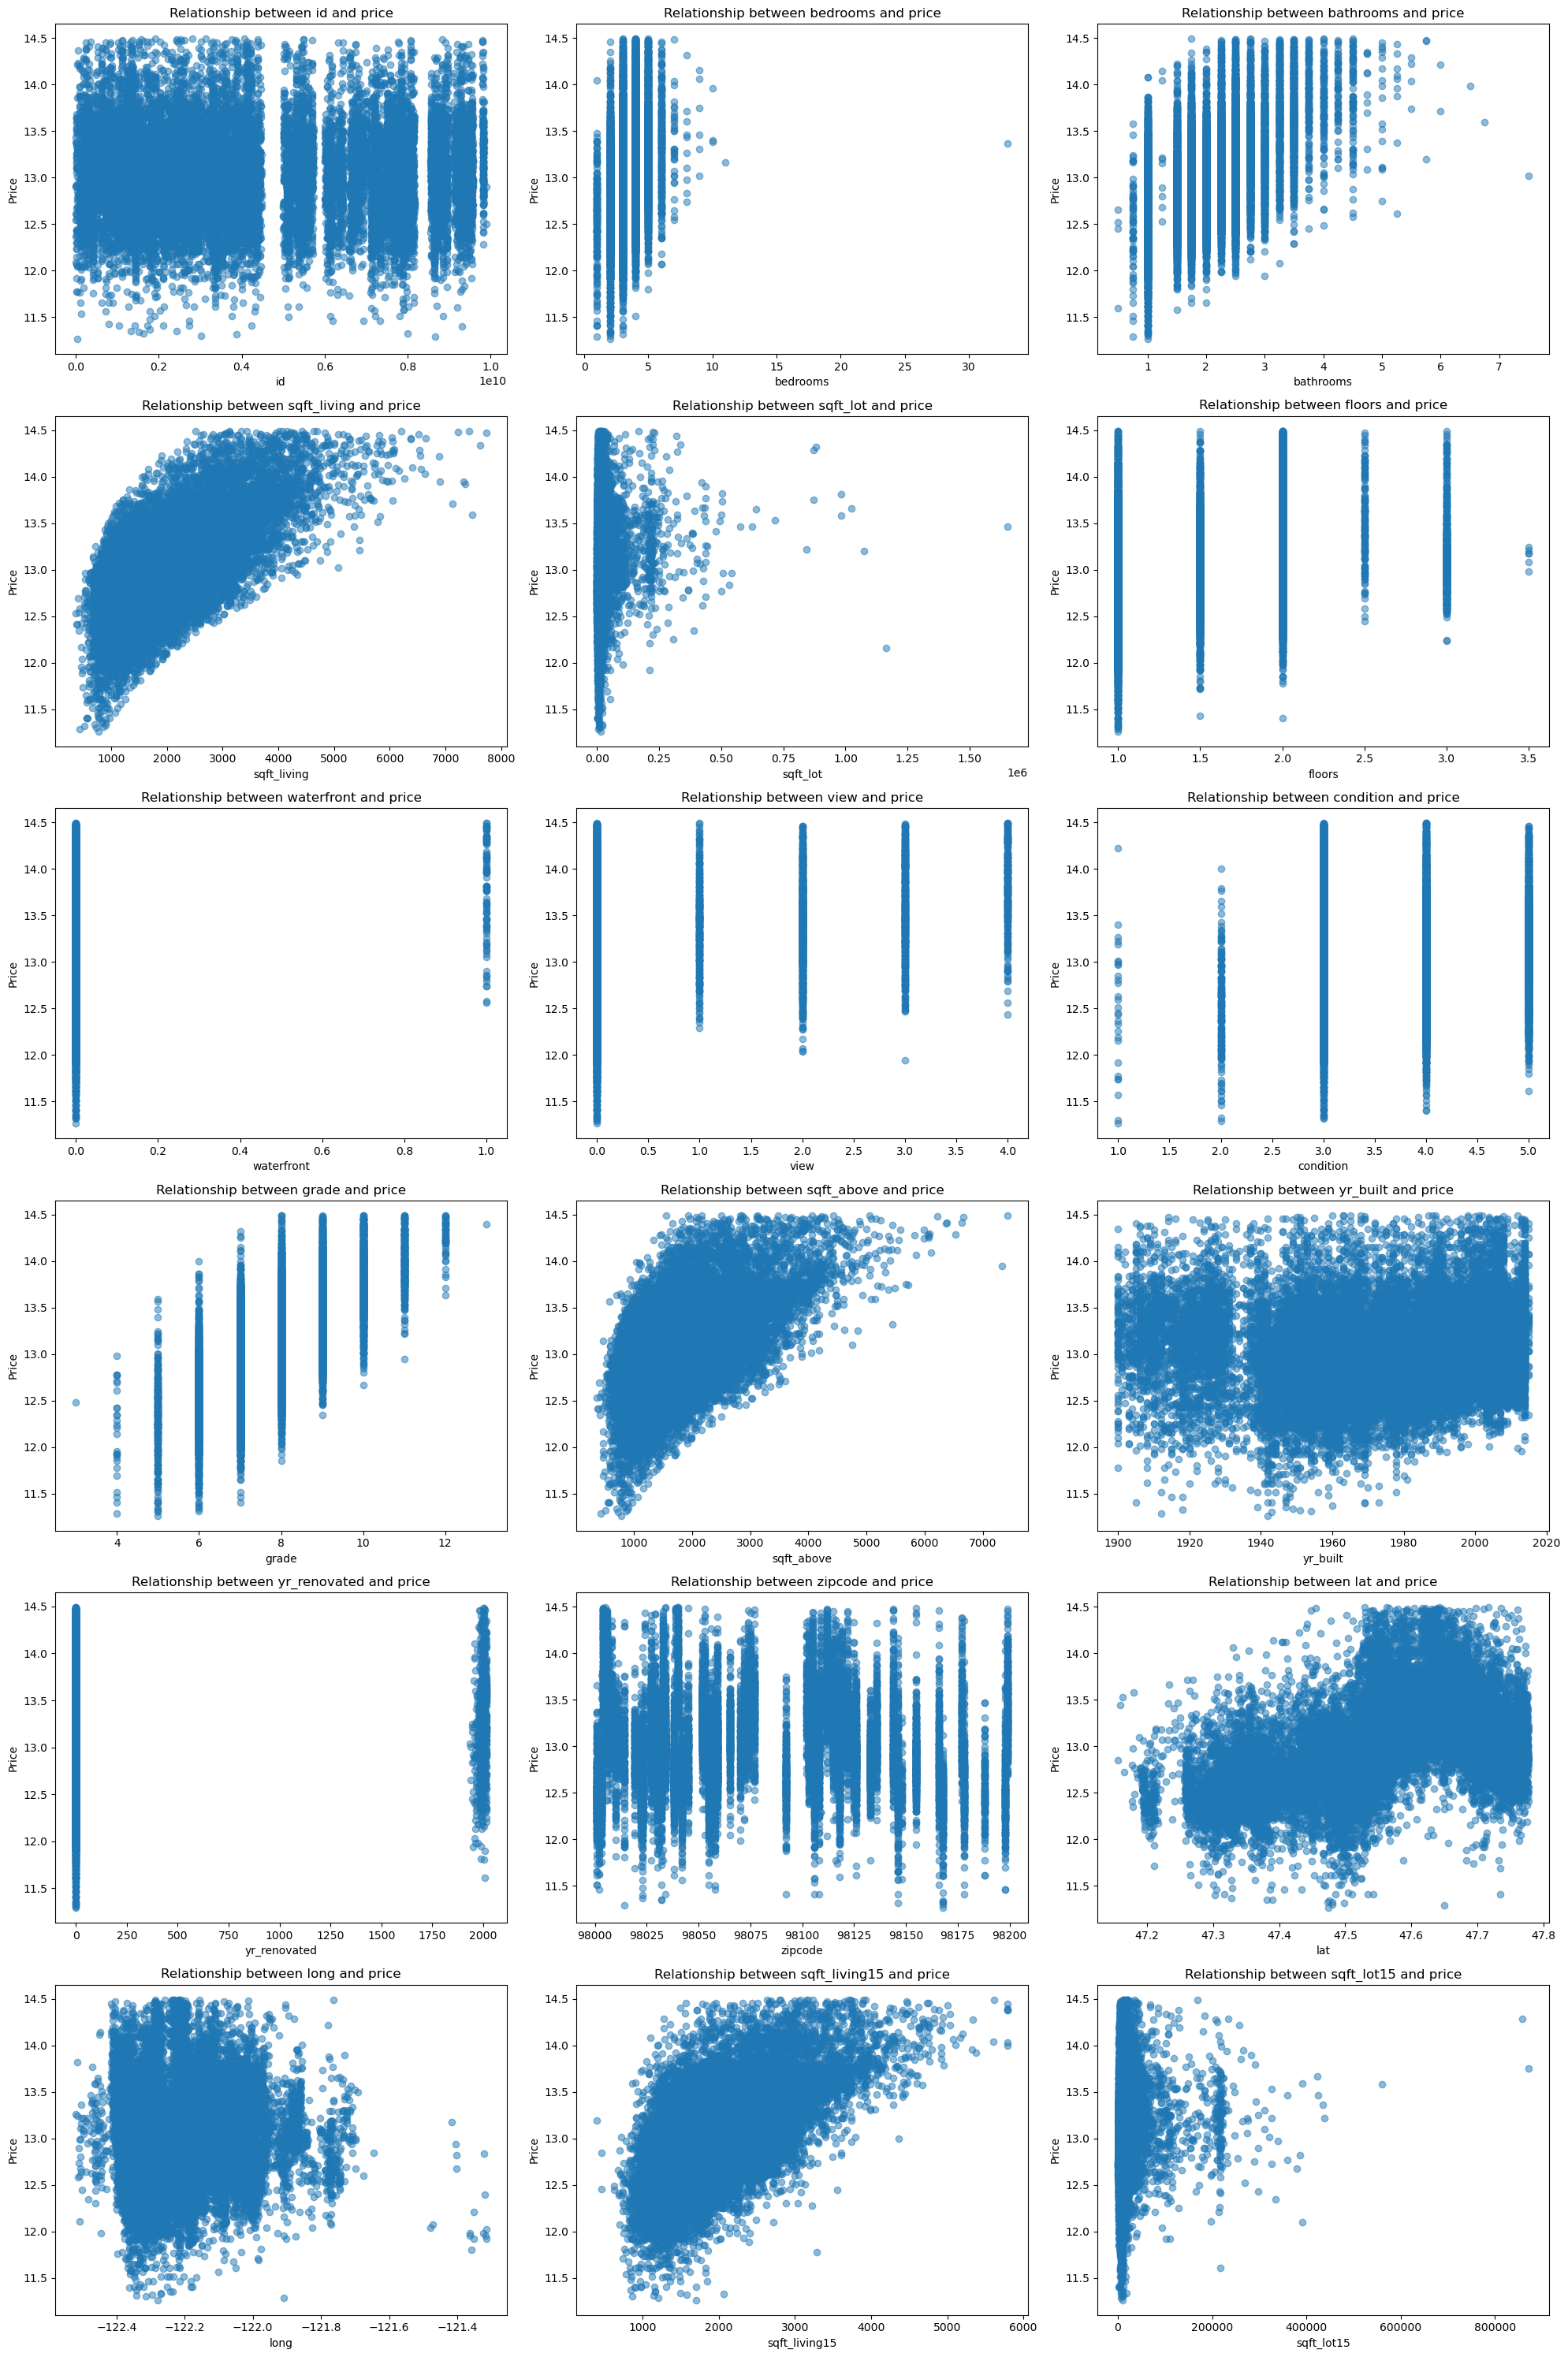

In [24]:
columns_to_plot = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'price']

n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 5))

axes = axes.flatten()

for idx, column in enumerate(columns_to_plot):
    ax = axes[idx]
    ax.scatter(df[column], df['price'], alpha=0.5)
    ax.set_title(f'Relationship between {column} and price')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')

for idx in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

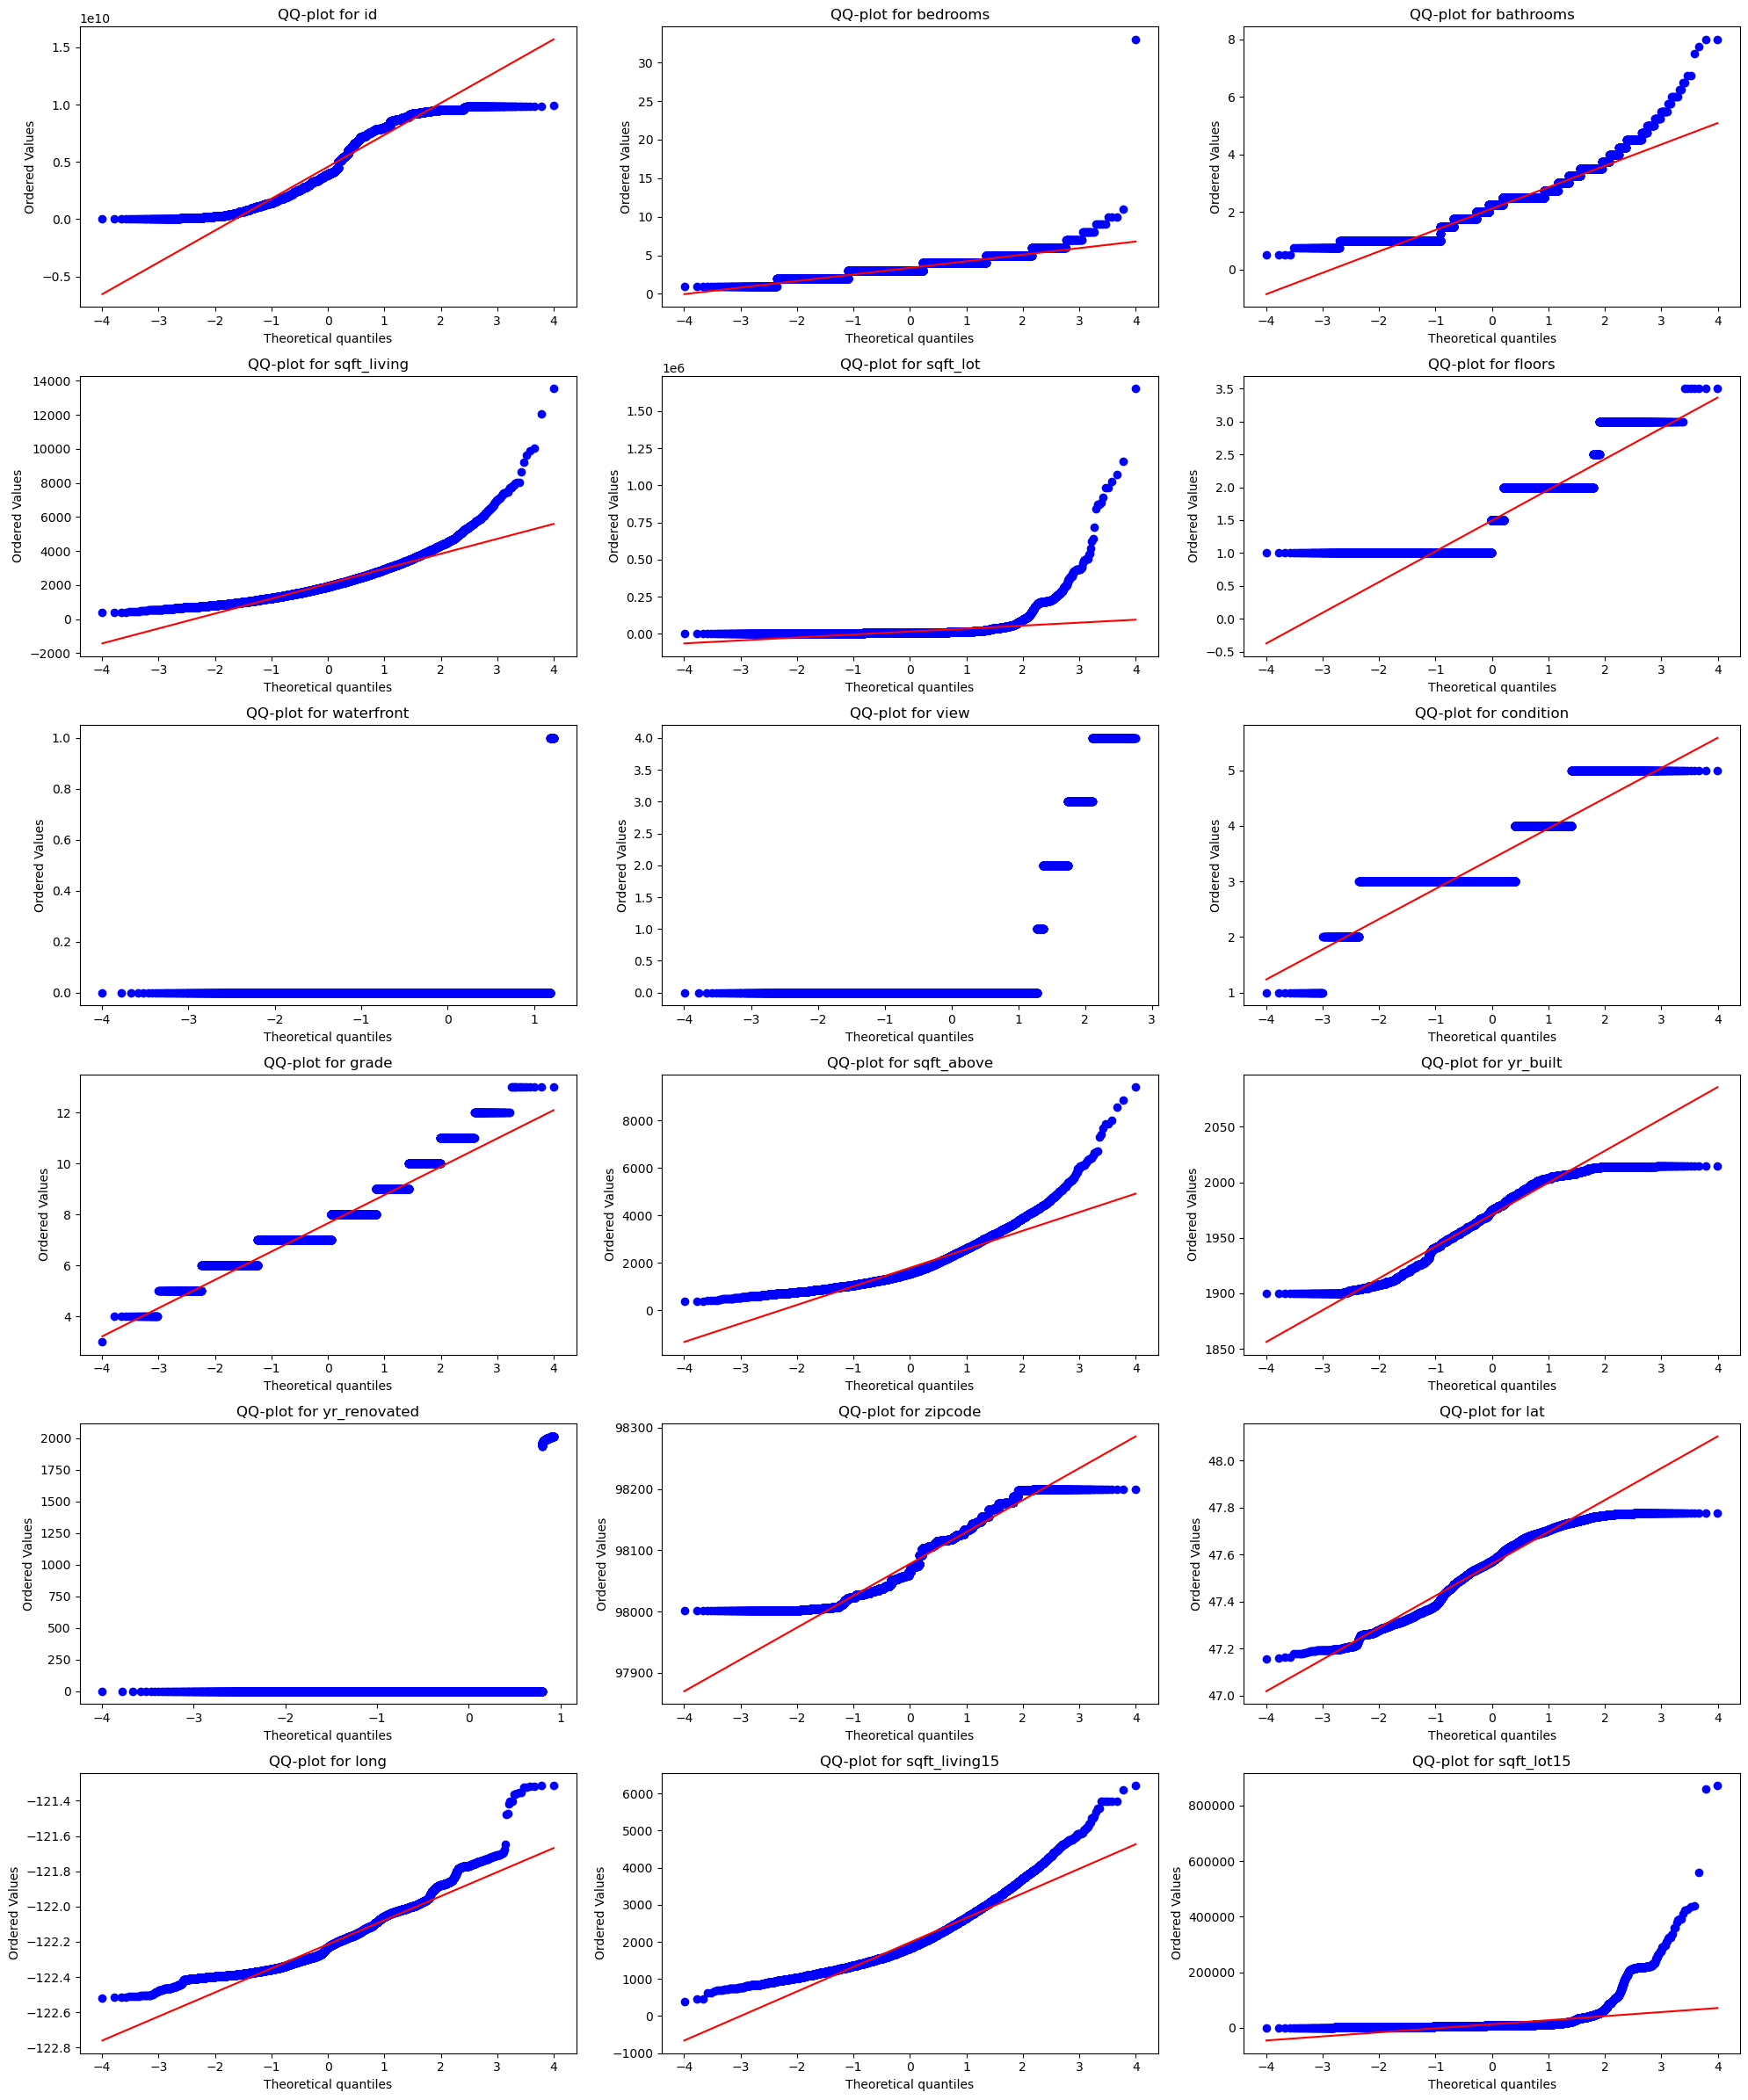

In [19]:
%matplotlib inline

columns_to_plot = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'price']

n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten()

for idx, column in enumerate(columns_to_plot):
    ax = axes[idx]  
    probplot(df[column], plot=ax)
    ax.set_title(f'QQ-plot for {column}')

for idx in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[idx])
        
plt.tight_layout()
plt.show()

C:\Users\sajsa\AppData\Local\Temp\ipykernel_24780\2443660595.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


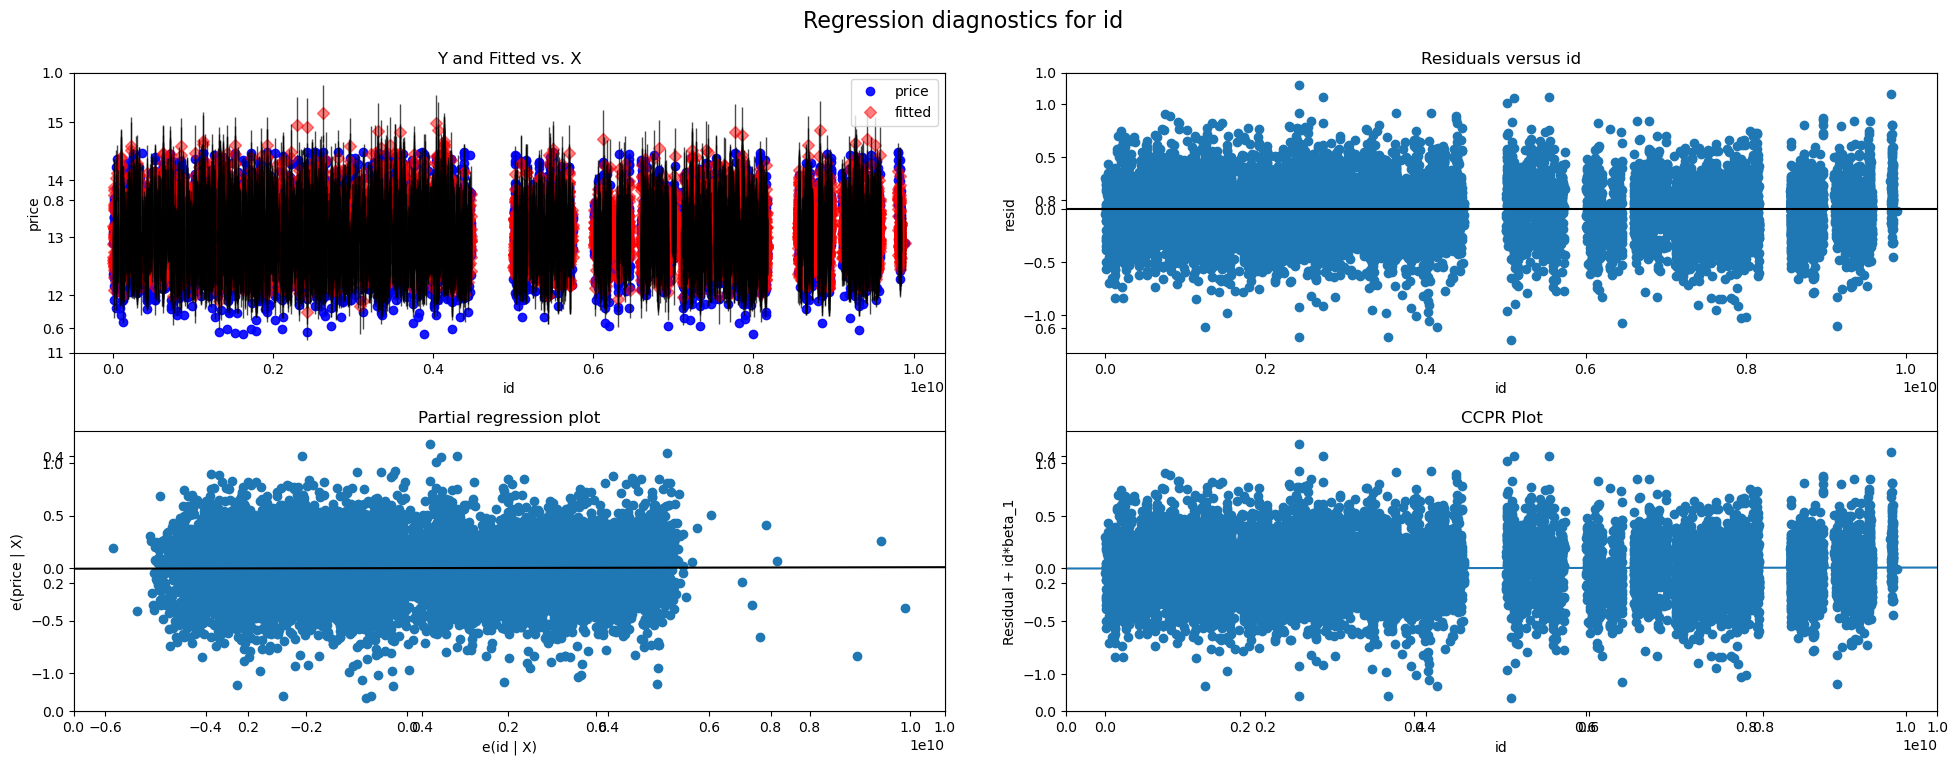

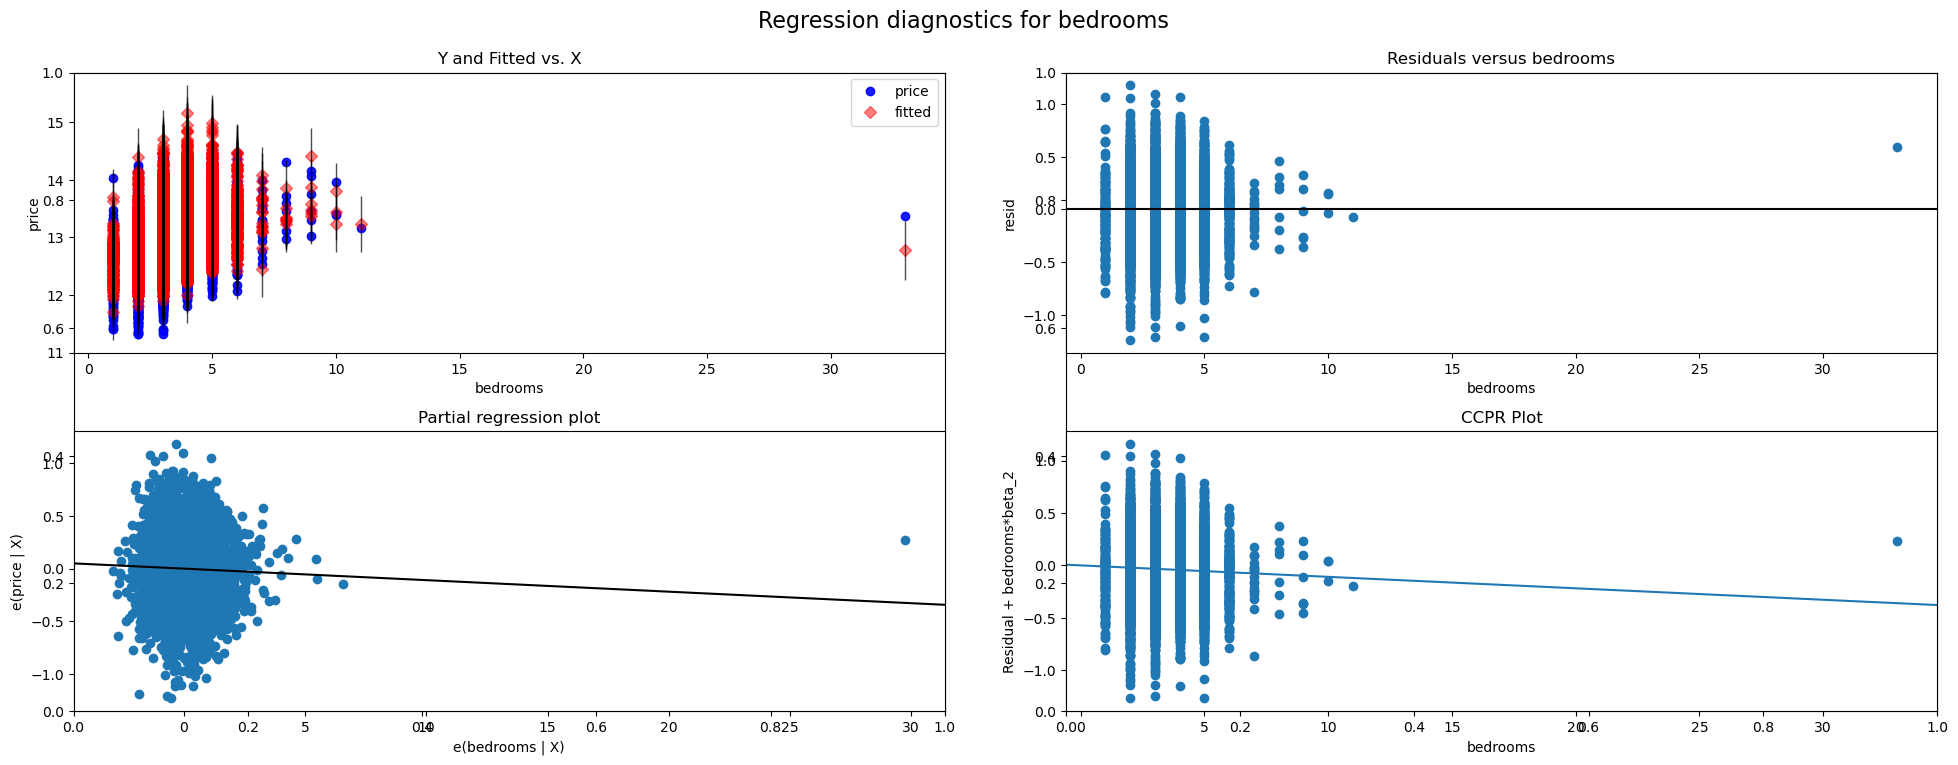

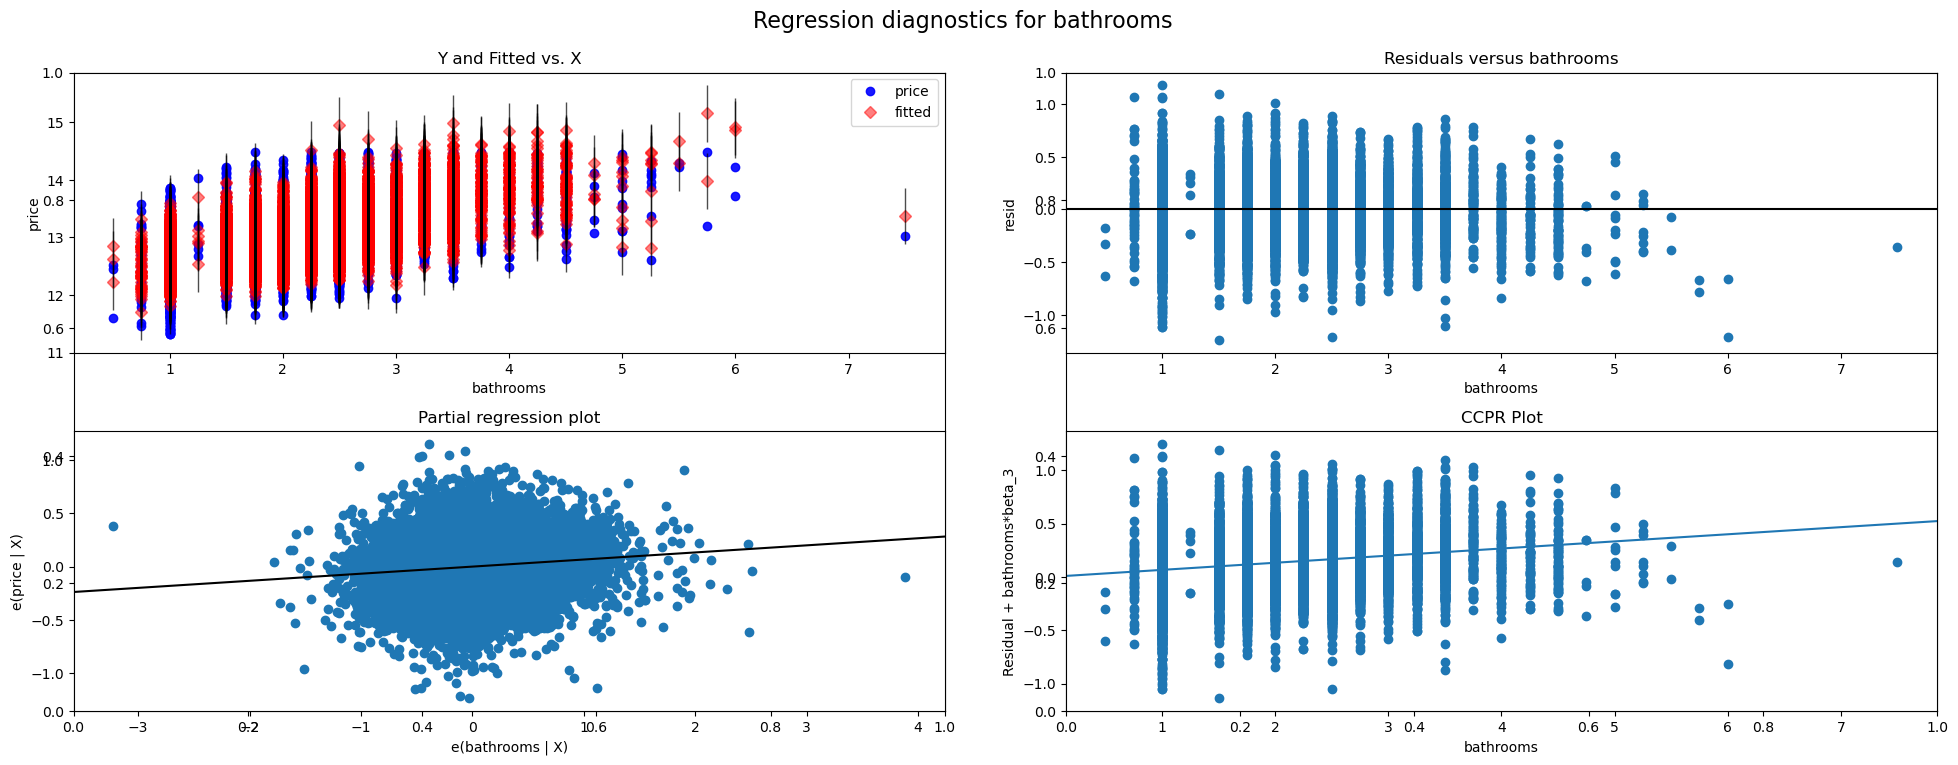

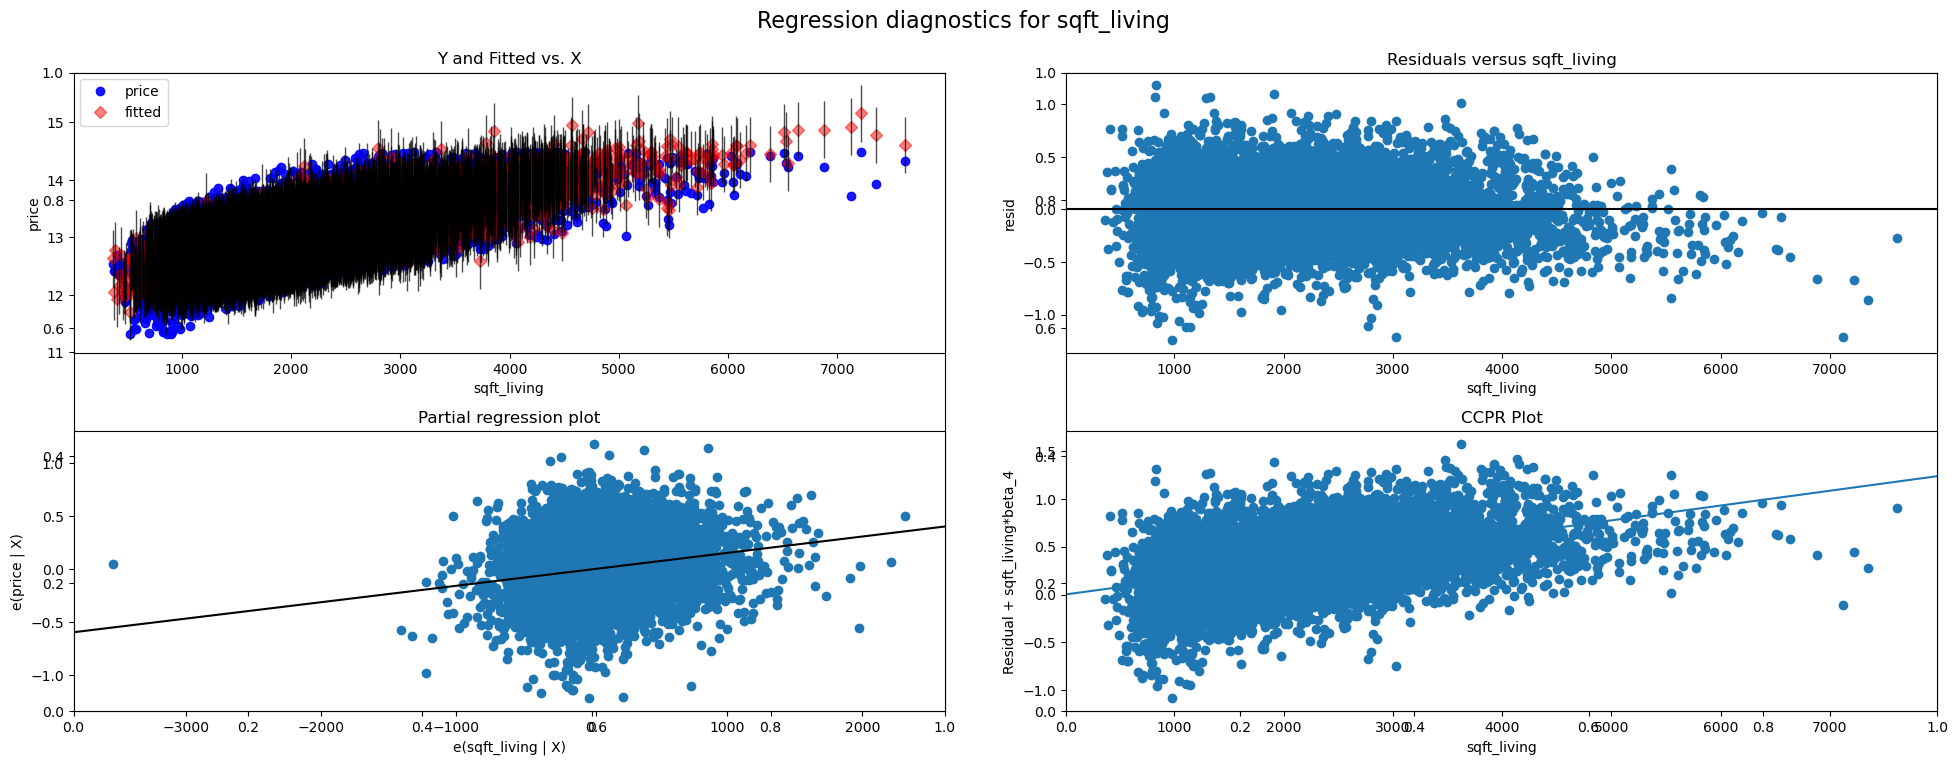

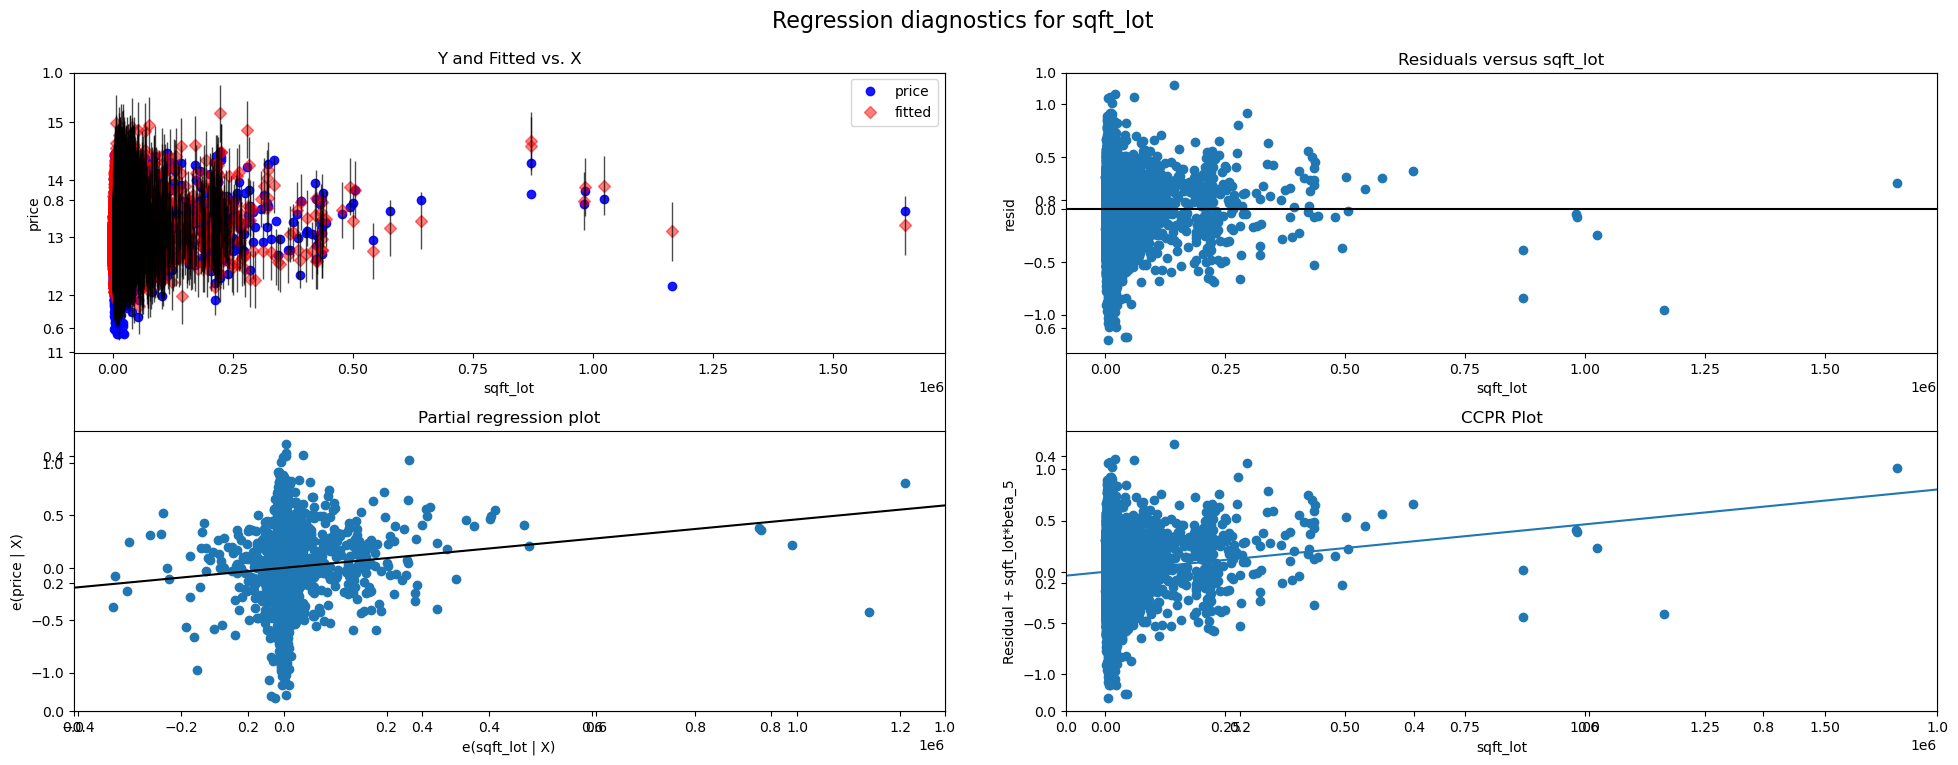

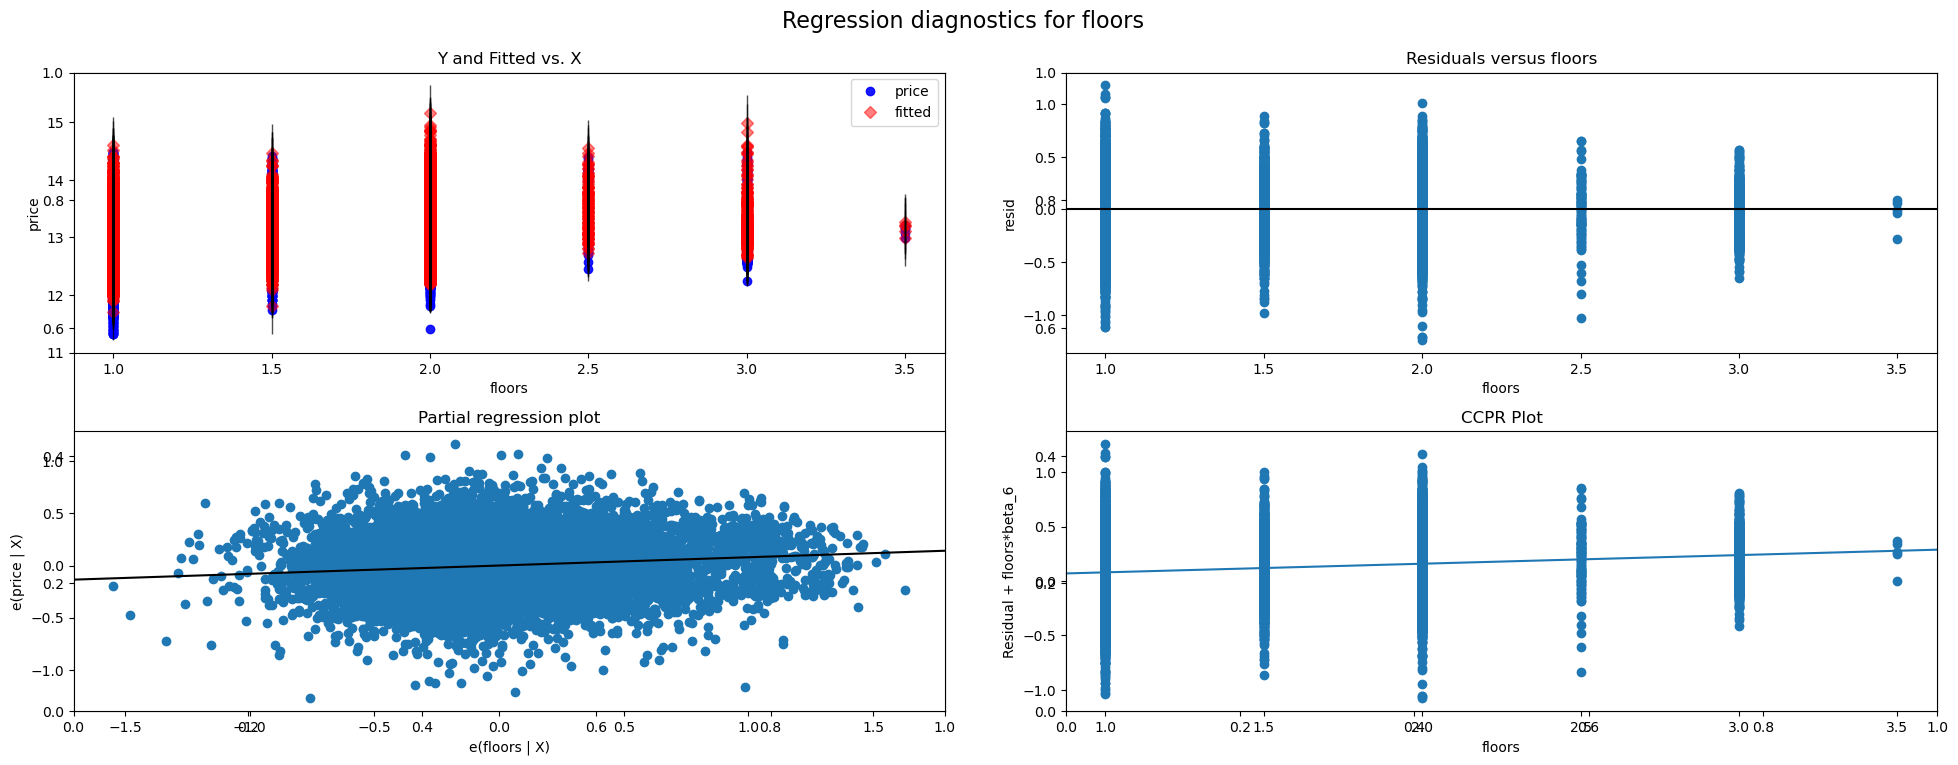

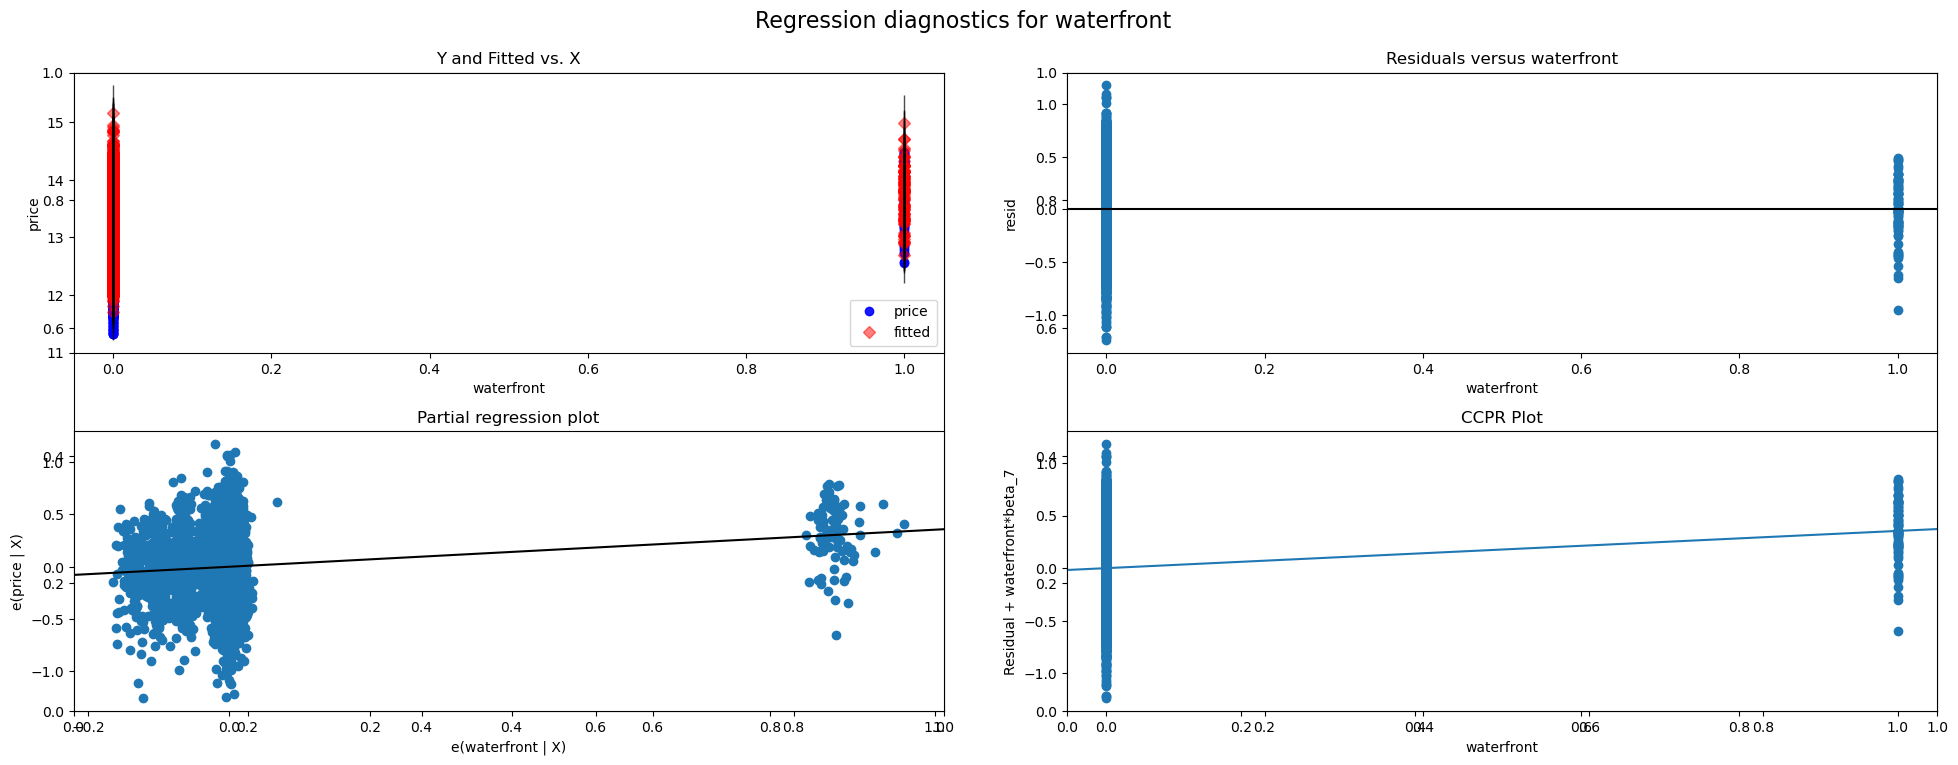

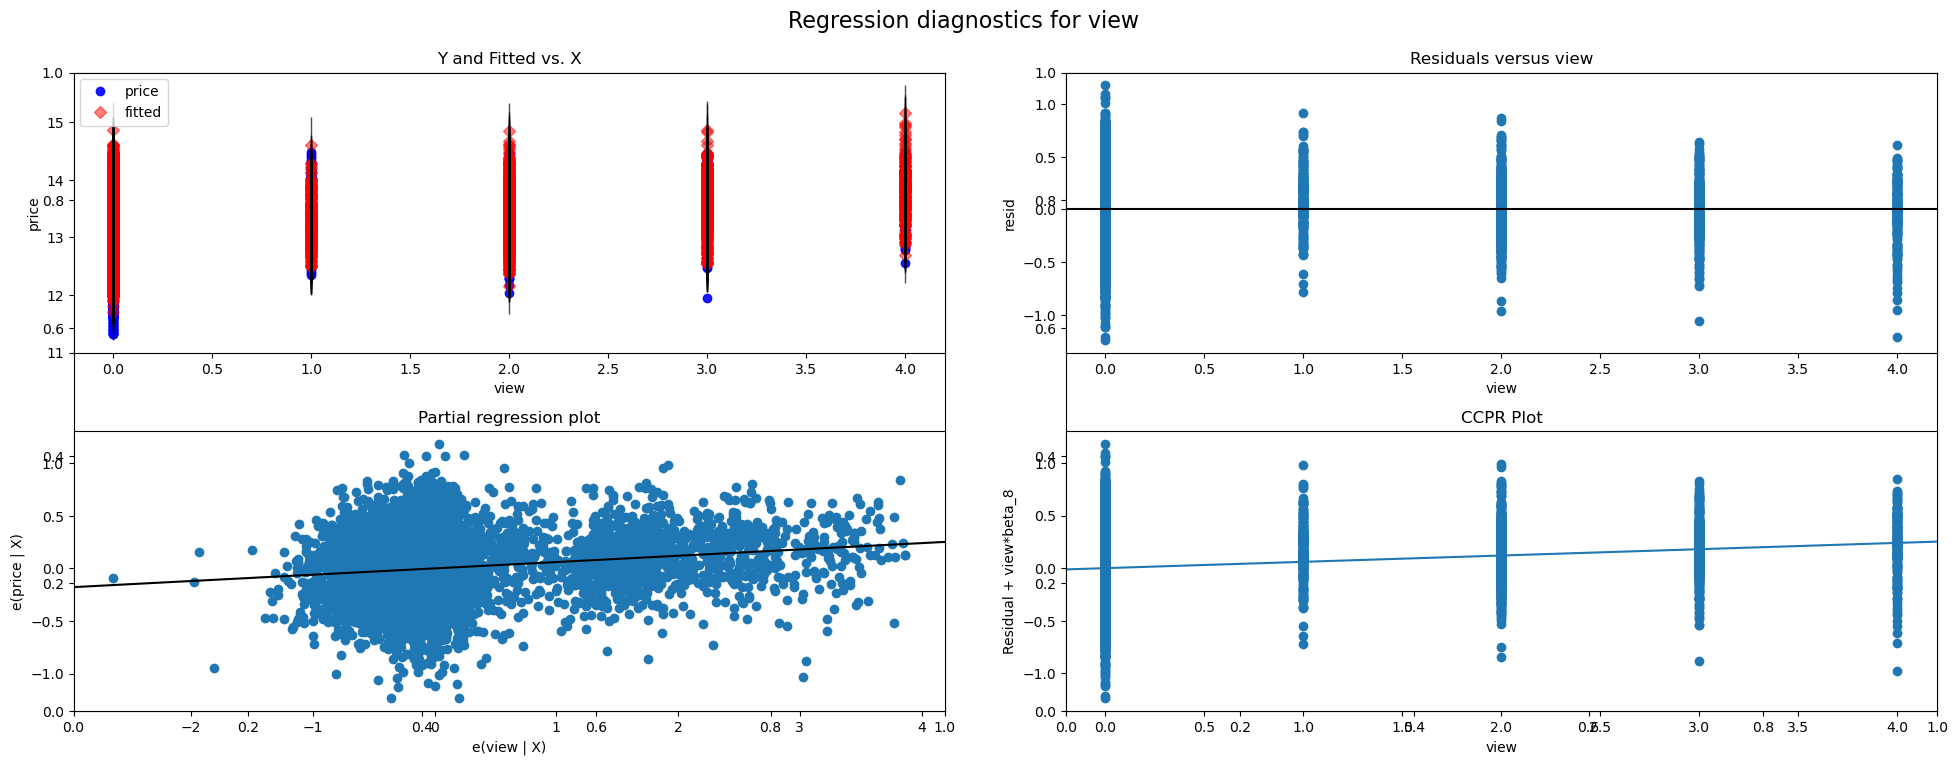

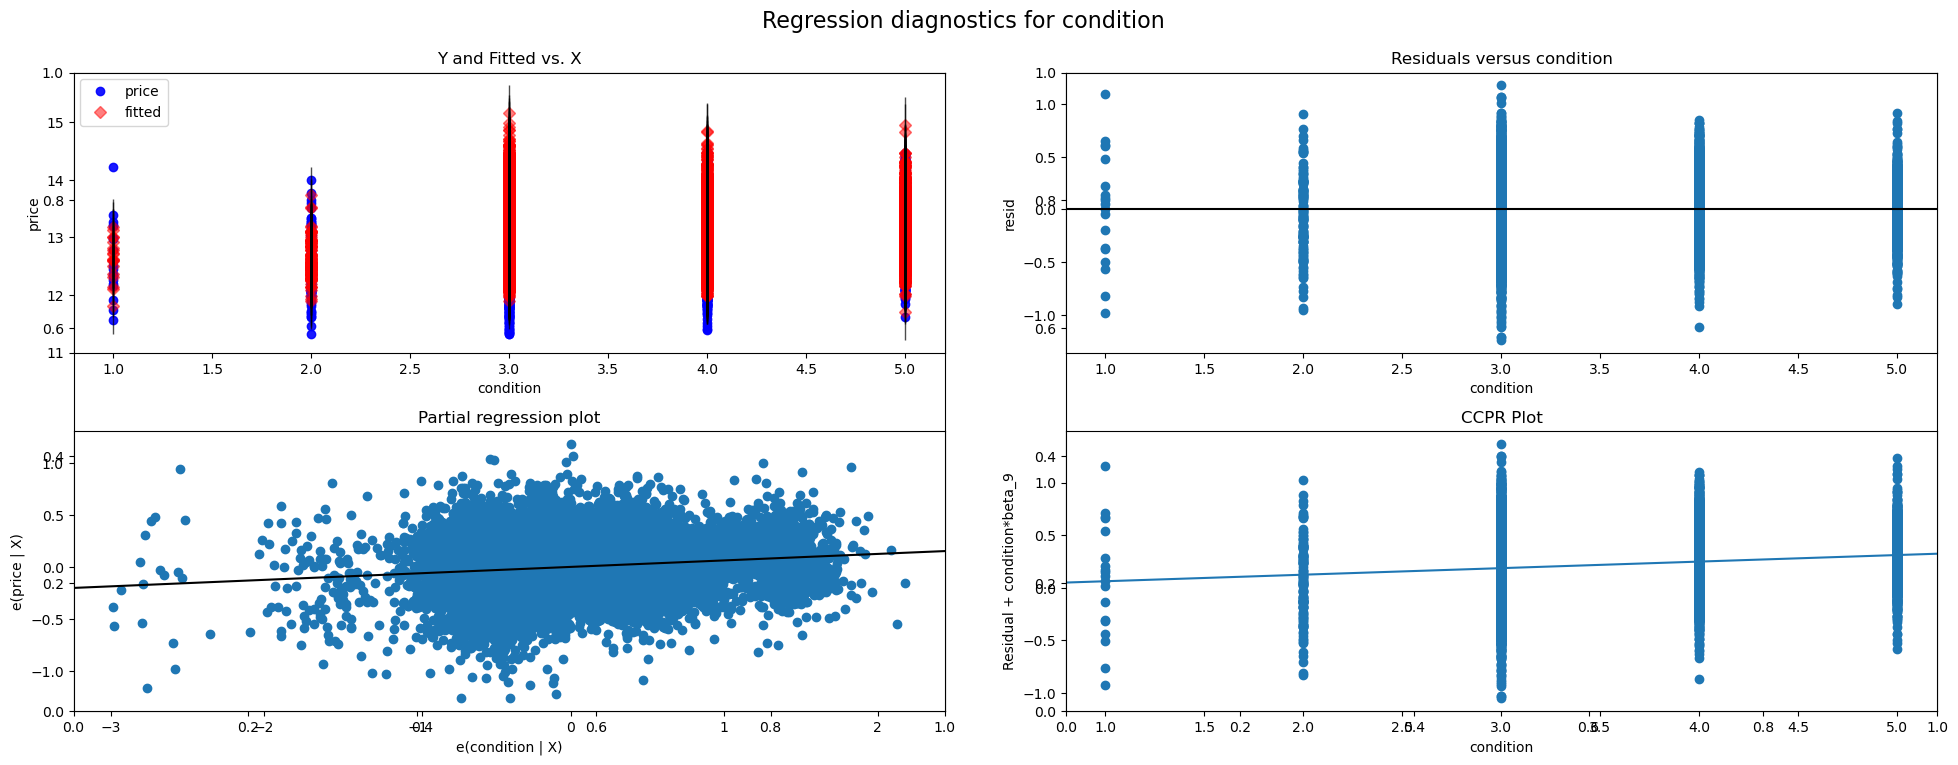

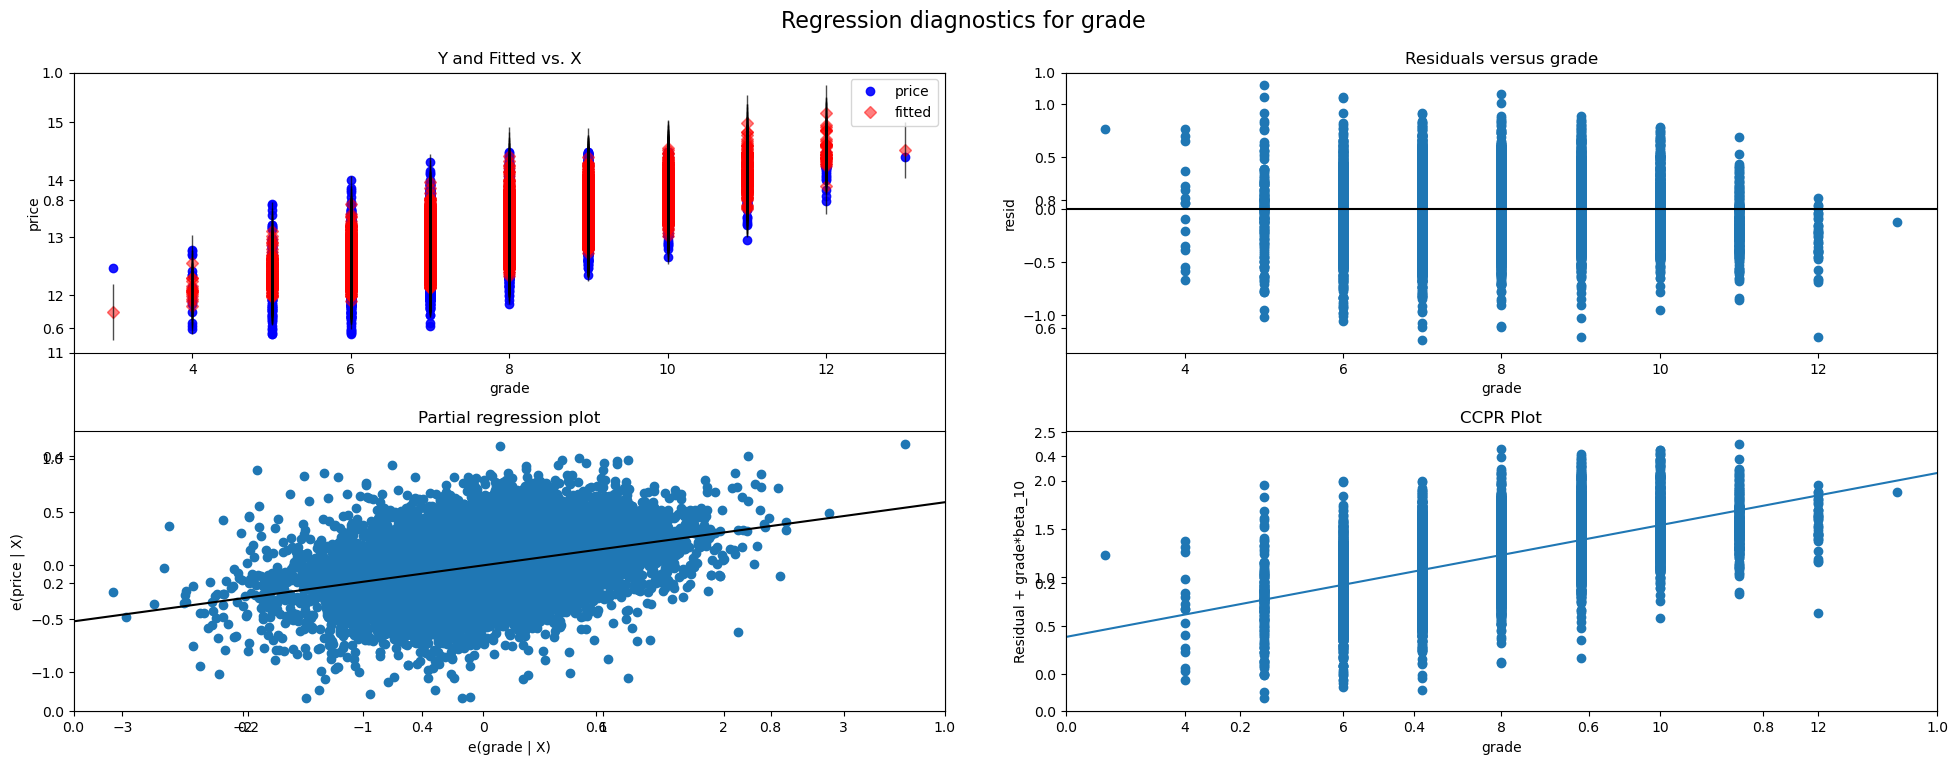

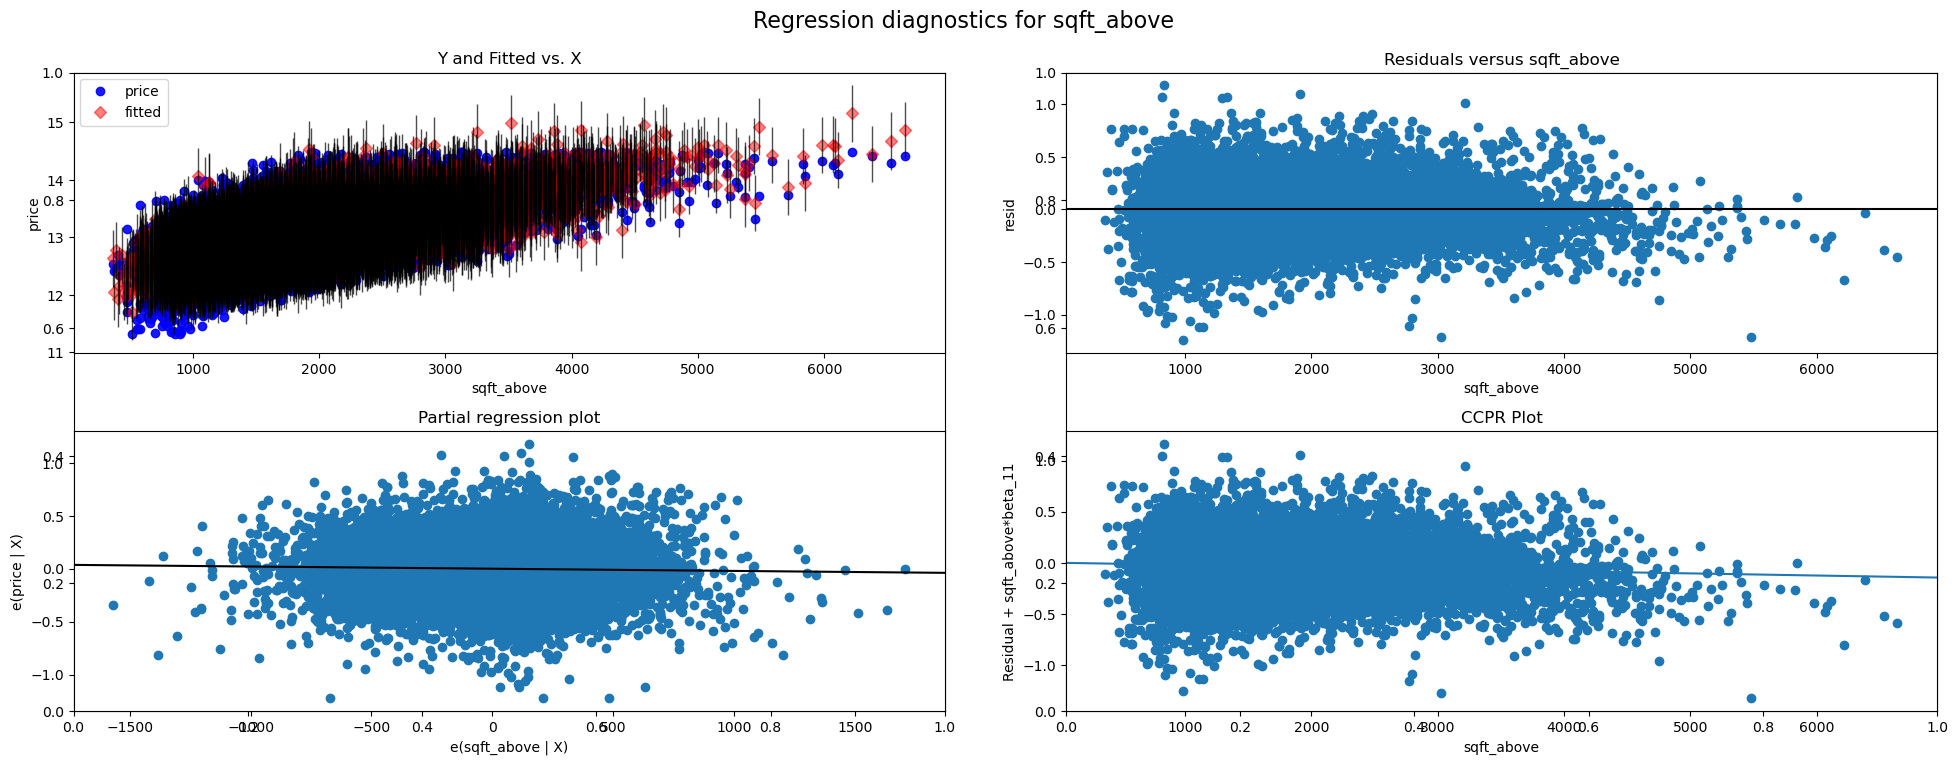

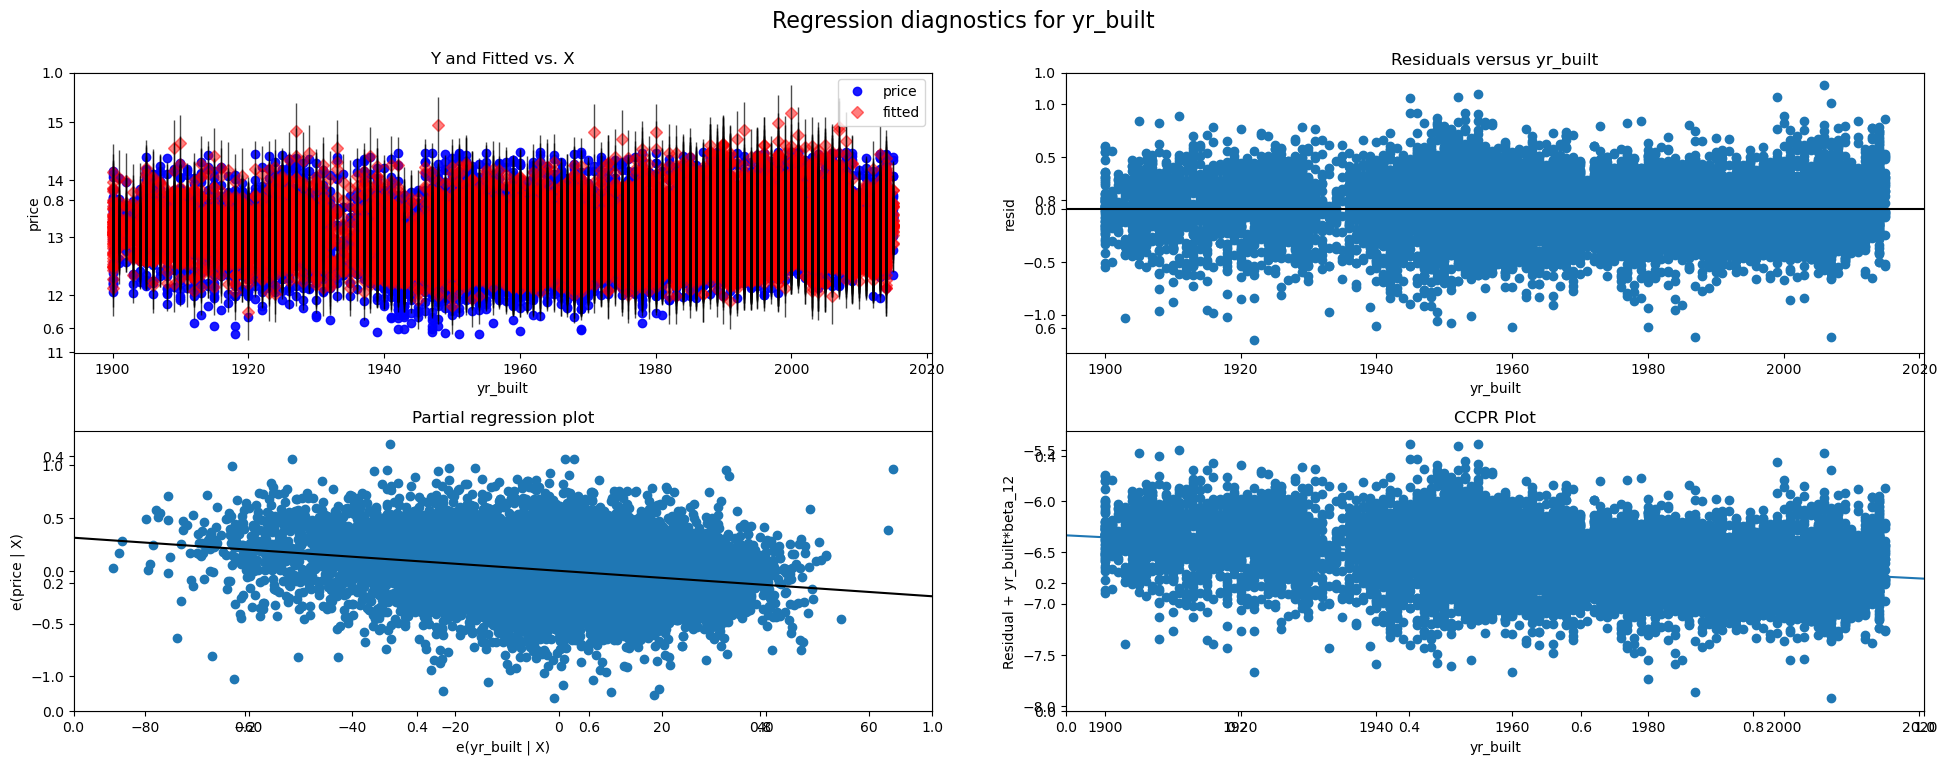

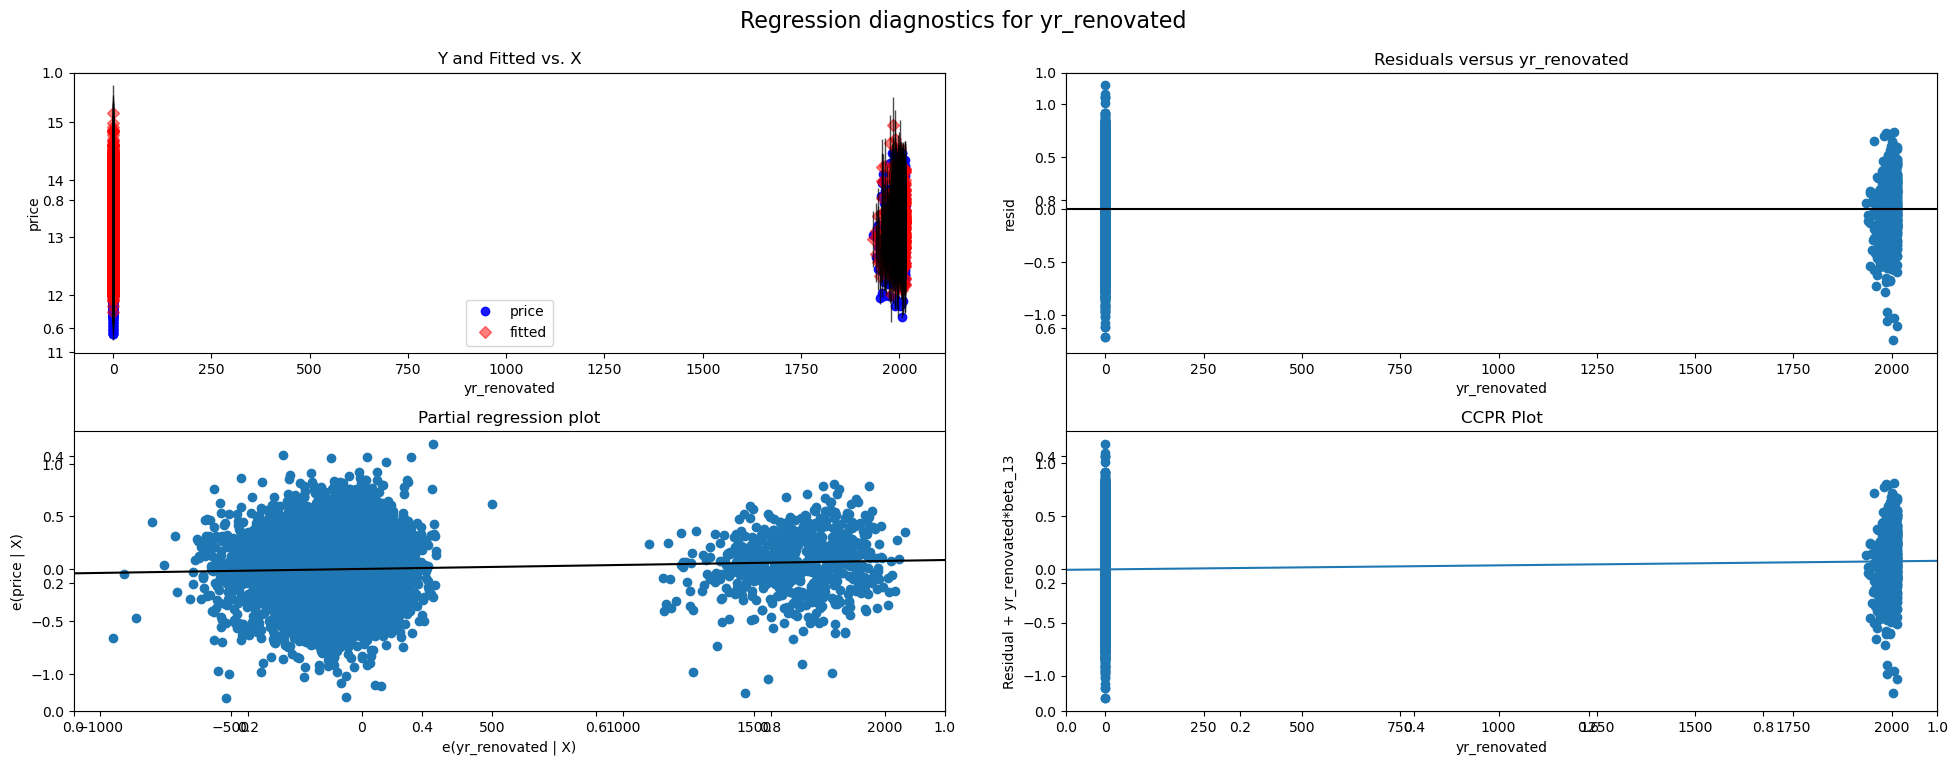

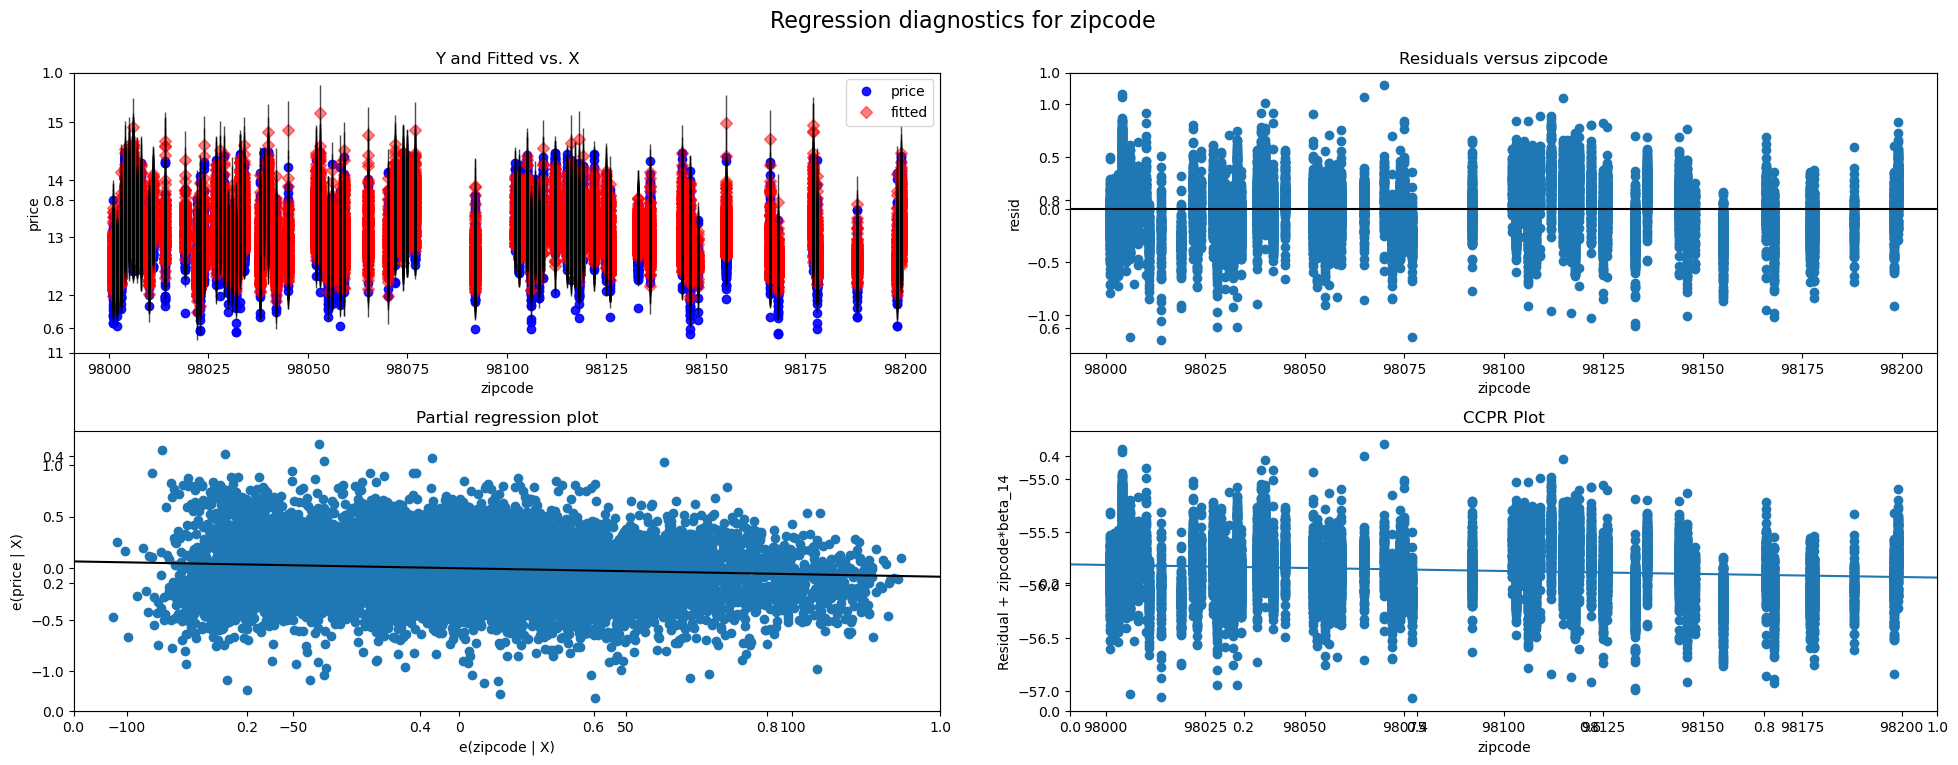

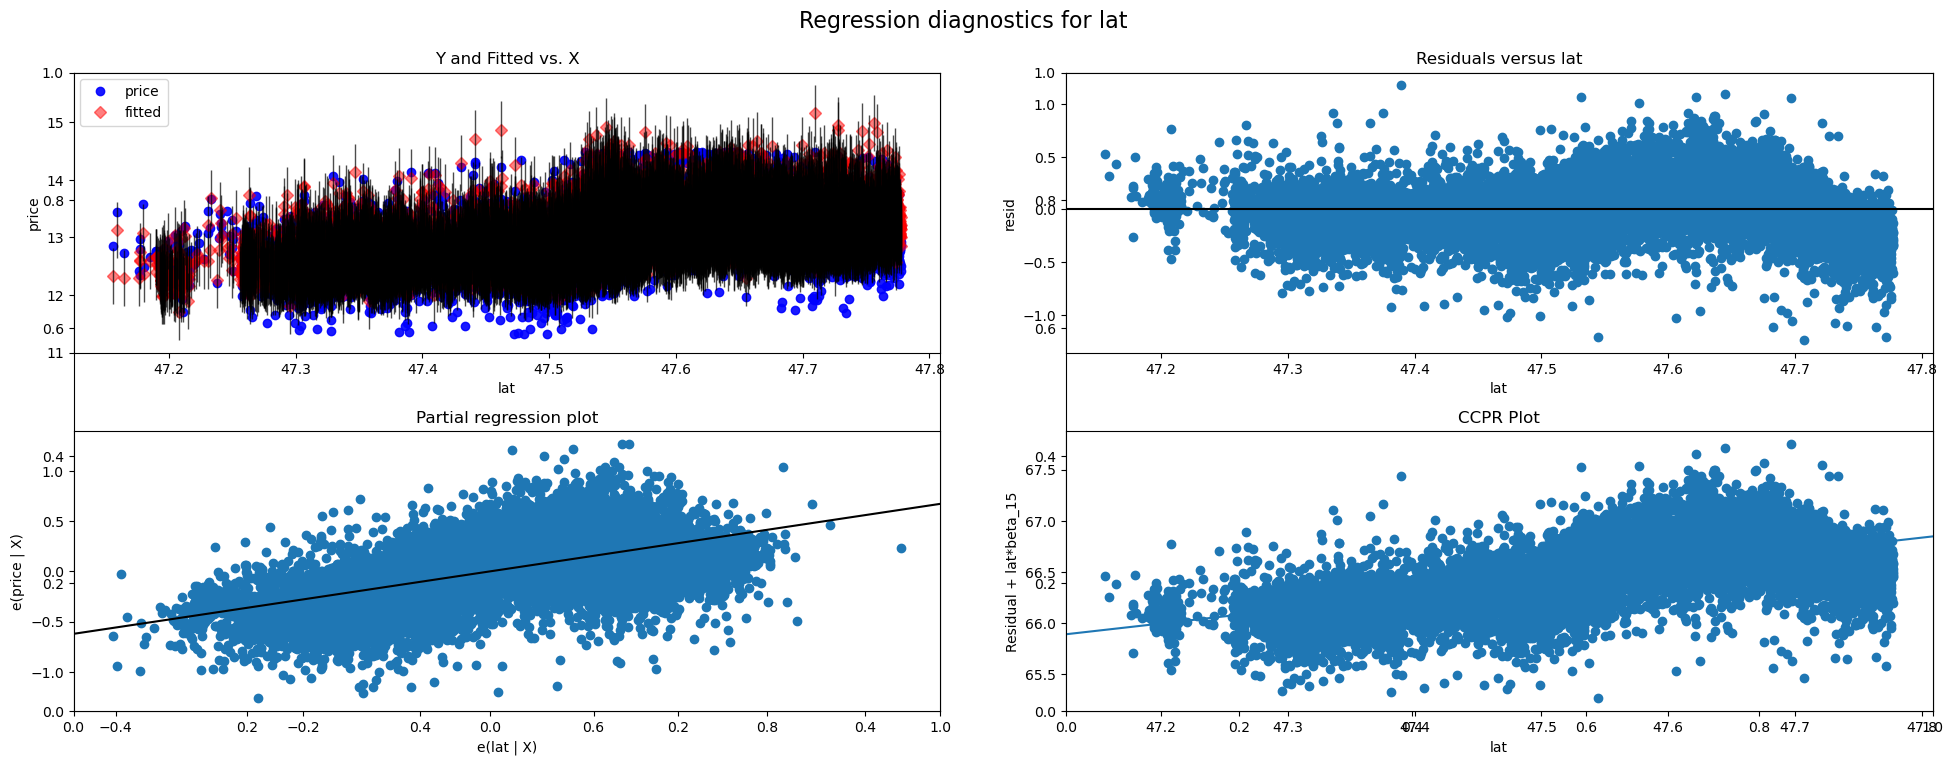

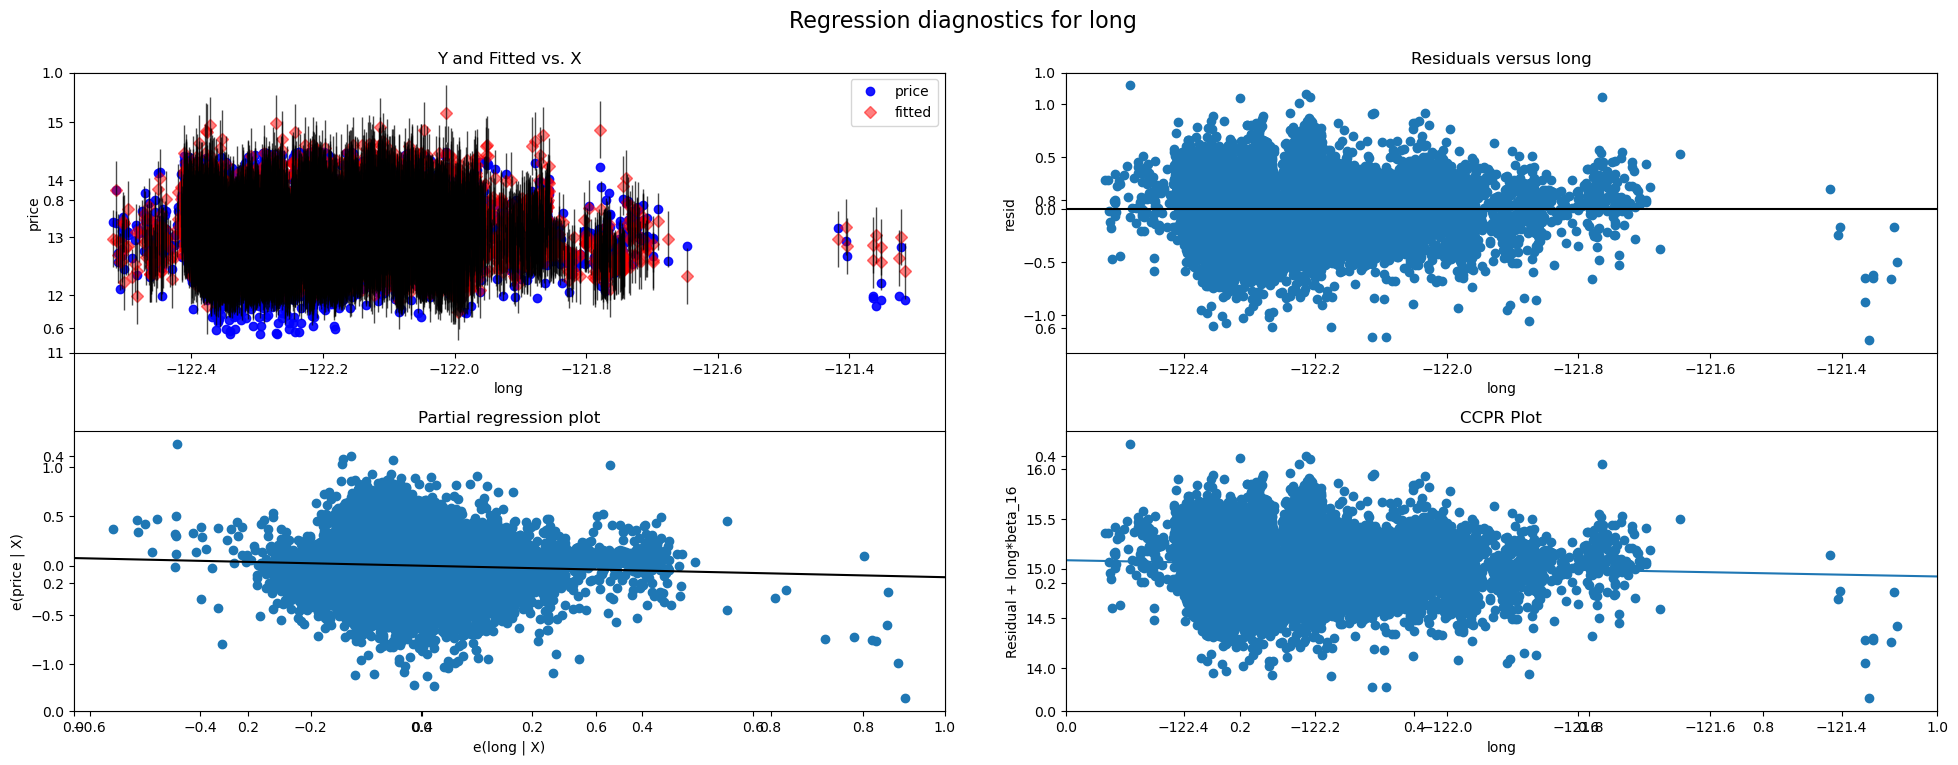

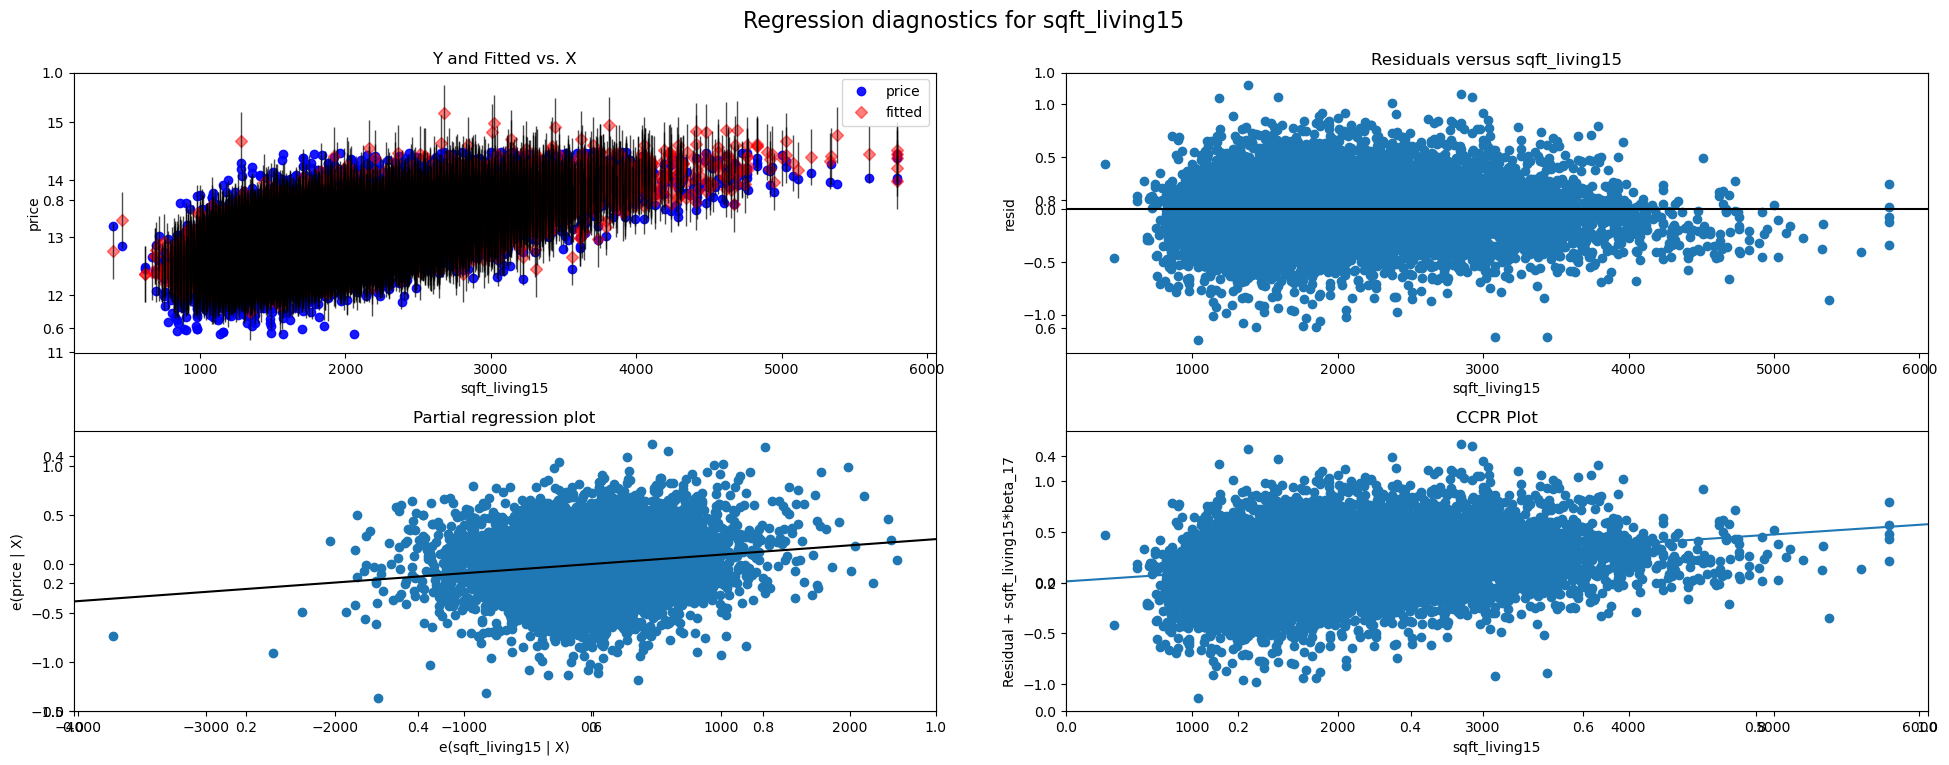

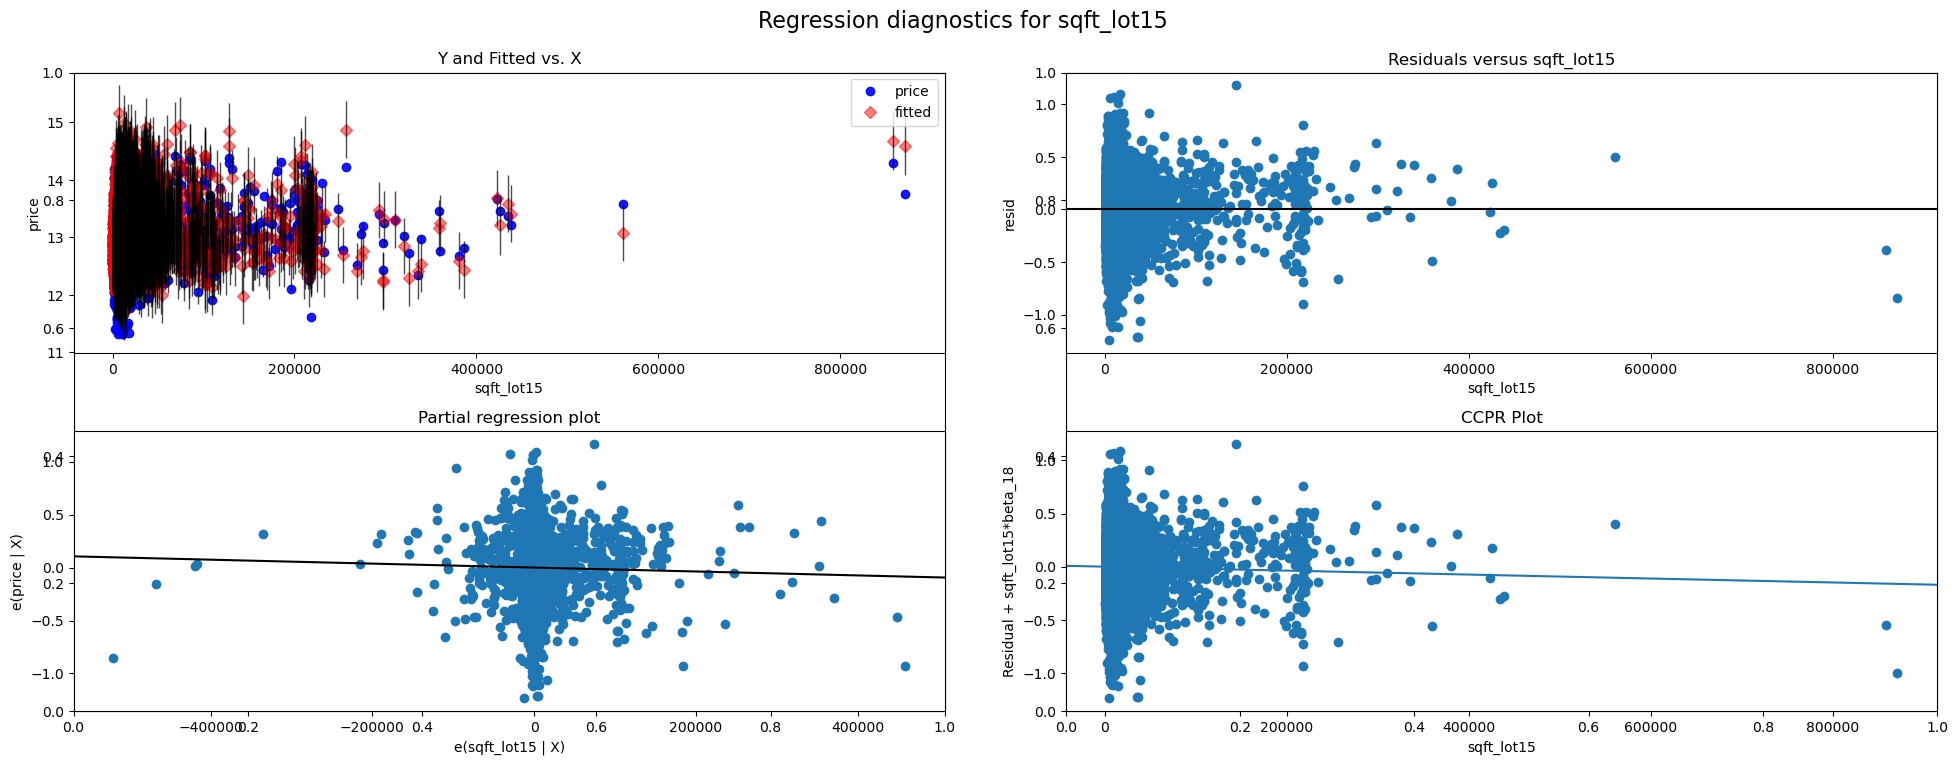

In [27]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

columns_to_plot = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'price']

formula = 'price ~ ' + ' + '.join(columns_to_plot)
model = smf.ols(formula=formula, data=df).fit()

for idx, column in enumerate(columns_to_plot):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
   
    sm.graphics.plot_regress_exog(model, column, fig=fig)
    
    fig.suptitle(f'Regression diagnostics for {column}', fontsize=16)
    
    plt.tight_layout()
    plt.show()

In [35]:
df.replace('?', np.nan, inplace=True)

numerical_cols = df.select_dtypes(include=['object']).columns.difference(['date'])
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.fillna(df.median(), inplace=True)

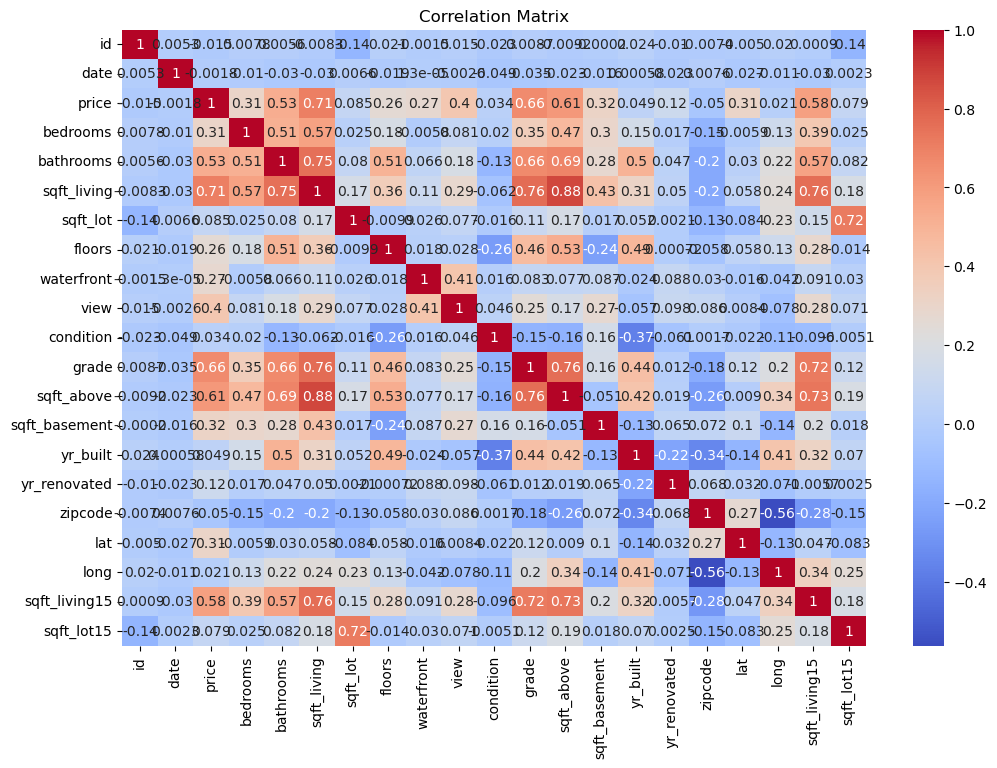

          Feature         VIF
0              id    3.652956
1           price    3.347421
2        bedrooms    1.663603
3       bathrooms    3.366510
4     sqft_living  149.089387
5        sqft_lot    2.104266
6          floors    1.957622
7      waterfront    1.281197
8            view    1.459481
9       condition    1.231043
10          grade    3.720411
11     sqft_above  120.303755
12  sqft_basement   33.489132
13       yr_built    2.261028
14   yr_renovated    1.141370
15        zipcode    0.503546
16            lat    1.346564
17           long    1.831517
18  sqft_living15    2.905819
19     sqft_lot15    2.141292


In [36]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_cols
vif_data['VIF'] = [variance_inflation_factor(df[numerical_cols].values, i) for i in range(len(numerical_cols))]
print(vif_data)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('kc_house_data.csv')

df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

df.fillna(0, inplace=True)

X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
        'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
        'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 39851558217.47267


In [46]:
category_cols = ['waterfront', 'view', 'condition', 'grade', 'zipcode']

for col in category_cols:
    df[col] = df[col].astype('category')

# Encode categorical variables
df = pd.get_dummies(df, columns=category_cols, drop_first=True)

X = df.drop(columns=['price', 'date'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error after encoding categorical variables:", mse)

Mean Squared Error after encoding categorical variables: 22392934453.08565


In [37]:
import numpy as np
from sklearn.preprocessing import StandardScaler

df = df[df['price'] < df['price'].quantile(0.99)]

df['price'] = np.log(df['price'])

In [49]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(['date'])
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

X = df.drop(columns=['price', 'date'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error after removing outliers, log transformation, and normalization:", mse)

Mean Squared Error after removing outliers, log transformation, and normalization: 0.14681079970185626


In [48]:
##Conclusion

In [49]:
## Summary of Findings
##-The initial exploration of the data revealed various trends and correlations.
##-Data cleaning steps included handling missing values, converting data types, and removing duplicates.
##-The baseline model provided a starting point for our predictions.

## Model Iterations
##-In Iteration 1, we built a baseline linear regression model.
##-In Iteration 2, we improved the model by:
##-Converting categorical columns to category data type and encoding them.
##-Removing outliers and applying log transformation and normalization.

## Model Performance
##-The Mean Squared Error (MSE) was significantly reduced through each iteration, demonstrating the improvements in the model's accuracy.

## Future Work
##-Explore more advanced models such as Random Forest, Gradient Boosting, or Neural Networks.
##-Implement hyperparameter tuning for further optimization.
##- Deploy the model in a production environment for real-time predictions.
